## 1.1

In [4]:
import astropy
import astroquery
import matplotlib.pyplot as plt
from astroquery.utils.tap.core import TapPlus
import pandas as pd
from astropy.coordinates import ICRS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.gaia import Gaia
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table 

Gaia.ROW_LIMIT = 100


job = Gaia.launch_job_async(
    f"""SELECT TOP 100 * \
    FROM gaiadr3.vari_rrlyrae \
    WHERE pf IS NOT NULL \
    AND num_clean_epochs_g > 40;""", dump_to_file=True)

# NGC 6397 - 17 40 42.09 -53 40 27.6

rrly = job.get_results().to_pandas()

In [2]:
print(rrly[:10])

          solution_id           source_id        pf  pf_error  p1_o  \
0  375316653866487565  245002531050576896  0.520512  0.000006   NaN   
1  375316653866487565  245504251951140864  0.507115  0.000004   NaN   
2  375316653866487565  245823861938360064  0.478764  0.000003   NaN   
3  375316653866487565  246756973652292992  0.489303  0.000003   NaN   
4  375316653866487565  359112665277840512  0.501780  0.000003   NaN   
5  375316653866487565  414003442535159936  0.474868  0.000003   NaN   
6  375316653866487565  414081061185873792  0.588920  0.000003   NaN   
7  375316653866487565  414152842984521856  0.364381  0.000016   NaN   
8  375316653866487565  414254032403091072  0.418104  0.000004   NaN   
9  375316653866487565  415000566440590976  0.617383  0.000004   NaN   

   p1_o_error      epoch_g  epoch_g_error     epoch_bp  epoch_bp_error  ...  \
0         NaN  1705.132336       0.000008  1705.141478        0.000010  ...   
1         NaN  1705.941237       0.000006  1705.959324      

## 1.2

In [3]:
retrieval_type = 'EPOCH_PHOTOMETRY'   # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
data_structure = 'COMBINED'   # Options are: 'INDIVIDUAL', 'COMBINED', 'RAW'
data_release   = 'Gaia DR3'     # Options are: 'Gaia DR3' (default), 'Gaia DR2'


datalink = Gaia.load_data(ids=rrly['source_id'],
                          data_release = data_release,
                          retrieval_type=retrieval_type, 
                          data_structure = data_structure, 
                          verbose = False, 
                          output_file = None)

dl_keys  = [inp for inp in datalink.keys()]
dl_keys.sort()

print()
print(f'The following Datalink products have been downloaded:')
for dl_key in dl_keys:
    print(f' * {dl_key}')



The following Datalink products have been downloaded:
 * EPOCH_PHOTOMETRY_COMBINED.xml


In [4]:
datalink['EPOCH_PHOTOMETRY_COMBINED.xml'][0]

<Table length=16638>
     source_id          transit_id     band  ... other_flags    solution_id    
                                             ...                               
       int64              int64       object ...    int64          int64       
------------------- ----------------- ------ ... ----------- ------------------
 245002531050576896 17127455701357856      G ...           5 375316653866487564
 245002531050576896 18963346597122114      G ...           1 375316653866487564
 245002531050576896 18973087399306294      G ...           1 375316653866487564
 245002531050576896 24162597315961460      G ...           1 375316653866487564
 245002531050576896 24166689644275234      G ...           1 375316653866487564
 245002531050576896 24771107999851979      G ...           1 375316653866487564
 245002531050576896 24775200284660578      G ...           1 375316653866487564
 245002531050576896 26805533587595801      G ...           1 375316653866487564
 245002531050576896

In [5]:
rrly_epoch = datalink['EPOCH_PHOTOMETRY_COMBINED.xml'][0].to_table().to_pandas()

In [6]:
rrly_epoch = rrly_epoch[rrly_epoch['band'] == 'G']

Text(0.5, 1.0, 'Lightcurve for SRC 245002531050576896')

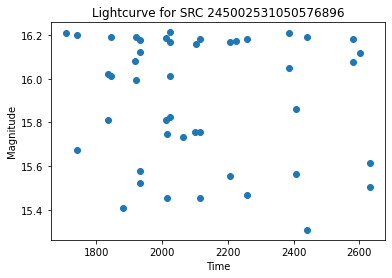

In [7]:
src = rrly_epoch[(rrly_epoch['source_id'] == 245002531050576896)]
plt.scatter(src['time'], src['mag'])
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Lightcurve for SRC 245002531050576896")

## 1.3

In [8]:
from astropy.timeseries import LombScargle

In [9]:
LombScargle

astropy.timeseries.periodograms.lombscargle.core.LombScargle

In [10]:
src.head(5)

source_id         transit_id band         time        mag  \
0  245002531050576896  17127455701357856    G  1706.585607  16.212044   
1  245002531050576896  18963346597122114    G  1739.789484  16.201074   
2  245002531050576896  18973087399306294    G  1739.965654  15.674993   
3  245002531050576896  24162597315961460    G  1833.815905  15.812720   
4  245002531050576896  24166689644275234    G  1833.889908  16.021934   

           flux  flux_error  flux_over_error  rejected_by_photometry  \
0   6167.782827   18.128442       340.226837                   False   
1   6230.415279    9.977831       624.425781                   False   
2  10114.616893   18.687247       541.257751                   False   
3   8909.610250   22.796643       390.829926                   False   
4   7348.068998   21.787052       337.267700                   False   

   rejected_by_variability  other_flags         solution_id  
0                    False            5  375316653866487564  
1                    False            1  375316653866487564  
2                    False            1  375316653866487564  
3                    False            1  375316653866487564  
4                    False            1  375316653866487564

In [11]:
frequency, power = LombScargle(src['time'] * u.day, src['flux'], src['flux_error']).autopower(minimum_frequency= 1 / 8, 
                                                                  maximum_frequency= 1 / 0.5)

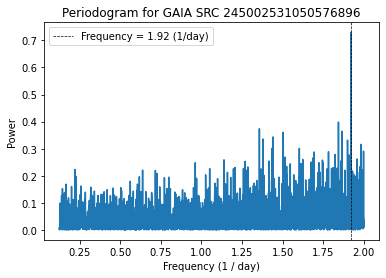

In [12]:
import matplotlib.pyplot as plt  
import numpy as np

plt.plot(frequency, power)
plt.xlabel("Frequency (1 / day)")
plt.ylabel("Power")
plt.axvline(frequency[power.argmax()], c = "k", ls = "--", lw = 0.7, label = f"Frequency = {frequency[power.argmax()].round(2)} (1/day)")
plt.title(f"Periodogram for GAIA SRC {src['source_id'][0]}")
plt.legend()
plt.savefig("lab1/figures/pdgram.png", bbox_inches = "tight")

In [13]:
1 / frequency[power.argmax()]

0.5204769334882592

## 1.4

In [14]:
time_id = rrly_epoch.groupby(['source_id'])['time'].apply(np.array).reset_index()
mag_id = rrly_epoch.groupby(['source_id'])['flux'].apply(np.array).reset_index()
err_id = rrly_epoch.groupby(['source_id'])['flux_error'].apply(np.array).reset_index()

In [15]:

final_id = time_id.merge(mag_id, on = 'source_id').reset_index()
final_id = final_id.merge(err_id, on = 'source_id').reset_index(drop = True)

In [16]:
final_id

index            source_id  \
0       0   245002531050576896   
1       1   245504251951140864   
2       2   245823861938360064   
3       3   246756973652292992   
4       4   359112665277840512   
..    ...                  ...   
95     95  6061741130185585280   
96     96  6061807062215683072   
97     97  6061866508861866240   
98     98  6061867986376466688   
99     99  6061905026177458176   

                                                 time  \
0   [1706.5856067422114, 1739.7894840400877, 1739....   
1   [1707.0852888573363, 1740.4660972566583, 1740....   
2   [1706.6587213436203, 1706.834894854087, 1740.2...   
3   [1706.833539352173, 1740.5384034684919, 1835.0...   
4   [1702.1574752162173, 1735.20584777197, 1735.27...   
..                                                ...   
95  [1699.7015184323245, 1733.3159979644993, 1733....   
96  [1699.4516050034085, 1699.5256071822303, 1733....   
97  [1700.1992364346315, 1700.2731966518586, 1734....   
98  [1734.8160953295915, 1734.8900991616222, 1780....   
99  [1734.8165876407481, 1734.8905912296848, 1780....   

                                                 flux  \
0   [6167.782826967349, 6230.415279264763, 10114.6...   
1   [1255.8047156356179, 1651.2819926840307, 1248....   
2   [566.6804850873045, 291.62298664219804, 468.90...   
3   [211247.9303480375, 226877.54250680207, 181045...   
4   [12739.74890744536, 5843.922463549918, 14443.1...   
..                                                ...   
95  [1916.975147377435, 1336.5647529788066, 1060.9...   
96  [242.52598338817913, 233.59362478531722, 297.0...   
97  [196.9988458899366, 156.51955621580265, 202.74...   
98  [4717.416417272154, 4799.257501011598, 7845.92...   
99  [670.8724916128732, 606.1613197741025, 548.899...   

                                           flux_error  
0   [18.128442302557097, 9.977831359467514, 18.687...  
1   [15.501401978117528, 9.79862890170444, 8.17436...  
2   [7.331586492178568, 9.404954570325243, 5.93381...  
3   [152.0134625088058, 189.2575871507966, 109.582...  
4   [20.250789599111396, 19.00755587784157, 16.794...  
..                                                ...  
95  [7.2087954651871735, 5.224353731137919, 11.814...  
96  [5.9136941112139585, 9.637892294729262, 6.8836...  
97  [6.348667581004041, 19.63332997764821, 4.88071...  
98  [9.960908588064056, 20.757746355910268, 19.228...  
99  [5.1416659488133565, 5.053795479329527, 6.5903...  

[100 rows x 5 columns]

In [17]:
rrly.columns

Index(['solution_id', 'source_id', 'pf', 'pf_error', 'p1_o', 'p1_o_error',
       'epoch_g', 'epoch_g_error', 'epoch_bp', 'epoch_bp_error', 'epoch_rp',
       'epoch_rp_error', 'epoch_rv', 'epoch_rv_error', 'int_average_g',
       'int_average_g_error', 'int_average_bp', 'int_average_bp_error',
       'int_average_rp', 'int_average_rp_error', 'average_rv',
       'average_rv_error', 'peak_to_peak_g', 'peak_to_peak_g_error',
       'peak_to_peak_bp', 'peak_to_peak_bp_error', 'peak_to_peak_rp',
       'peak_to_peak_rp_error', 'peak_to_peak_rv', 'peak_to_peak_rv_error',
       'metallicity', 'metallicity_error', 'r21_g', 'r21_g_error', 'r31_g',
       'r31_g_error', 'phi21_g', 'phi21_g_error', 'phi31_g', 'phi31_g_error',
       'num_clean_epochs_g', 'num_clean_epochs_bp', 'num_clean_epochs_rp',
       'num_clean_epochs_rv', 'zp_mag_g', 'zp_mag_bp', 'zp_mag_rp',
       'num_harmonics_for_p1_g', 'num_harmonics_for_p1_bp',
       'num_harmonics_for_p1_rp', 'num_harmonics_for_p1_rv',
       '

In [18]:
def get_freq_power(index):
    freq, power = LombScargle(final_id.loc[index]['time'], 
                final_id.loc[index]['flux'], final_id.loc[index]['flux_error'])\
                .autopower(minimum_frequency= 1 / 8, 
                           maximum_frequency= 1 / 0.5)
    
    return 1 / freq[power.argmax()]


final_id['period_ls'] = final_id['index'].map(get_freq_power)



In [19]:
comparison = final_id.merge(rrly, on = 'source_id')[['source_id', 'period_ls', 'pf']]
dup = final_id.merge(rrly, on = 'source_id')[['source_id', 'period_ls', 'pf']]

In [20]:
dup.columns = ['Source ID', 'Estimated Period (d)', 'GAIA Period (d)']
print(dup[['Source ID', 'Estimated Period (d)', 'GAIA Period (d)']][20:25].reset_index(drop = True)\
      .style.to_latex(position_float = 'centering', hrules = True))

\begin{table}
\centering
\begin{tabular}{lrrr}
\toprule
 & Source ID & Estimated Period (d) & GAIA Period (d) \\
\midrule
0 & 1934784777174637056 & 0.710674 & 0.710655 \\
1 & 1934869366550952448 & 0.535673 & 0.535698 \\
2 & 1935104150941800448 & 0.803901 & 0.803898 \\
3 & 1935230693559394816 & 0.521132 & 0.481906 \\
4 & 1935418400810447872 & 0.556609 & 0.556610 \\
\bottomrule
\end{tabular}
\end{table}



Although the values are very similar, they are not identical in some of the cases. This is because we are assuming that the variation is composed of the maximum power frequency, which is simply a sinusoid. However, RR Lyrae often have a more sawtooth like pattern, and because of this, although this approach may work for the majority of cases, it will certainly fail for others.

## 1.7

In [21]:
src_id = final_id.merge(comparison, on = ['source_id', 'period_ls'])[final_id['source_id'] == 6061867986376466688]

In [22]:
K = 10
y = src_id['flux'].iloc[0]
t = src_id['time'].iloc[0]
wt = 1 / ((src_id['flux_error'].iloc[0]) ** 2)

t_fold = t % (src_id['period_ls'].iloc[0]) / (src_id['period_ls'].iloc[0])
w = 2 * np.pi / src_id['period_ls'].iloc[0]

X = np.ones((len(y), 2 * K + 1))

for i in range(1, K + 1):
    X[:, i] = np.sin(i * w * t)
for i in range(K + 1, 2 * K + 1):
    X[:, i] = np.cos((i - K) * w * t)

Xw = X * np.sqrt(wt)[:, None]
yw = y * np.sqrt(wt)

beta = np.linalg.lstsq(Xw, yw, rcond=None)[0]

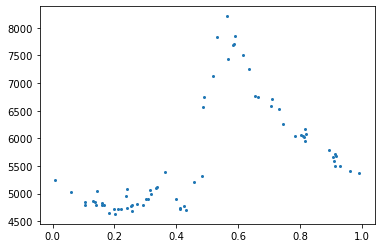

In [23]:
plt.scatter(t_fold, y, s = 4)

In [24]:
t_dense = np.linspace(1700, 2400, 1000)
t_fold_dense = (t_dense % src_id['period_ls'].iloc[0]) / src_id['period_ls'].iloc[0]
X_dense = np.ones((len(t_dense), 2 * K + 1))

for i in range(1, K + 1):
    X_dense[:, i] = np.sin(i * w * t_dense)
for i in range(K + 1, 2 * K + 1):
    X_dense[:, i] = np.cos((i - K) * w * t_dense)
    
X_pts = np.ones((len(t), 2 * K + 1))

for i in range(1, K + 1):
    X_pts[:, i] = np.sin(i * w * t)
for i in range(K + 1, 2 * K + 1):
    X_pts[:, i] = np.cos((i - K) * w * t)

In [25]:
high_cad = X_dense @ beta
idx = t_fold_dense.argsort()

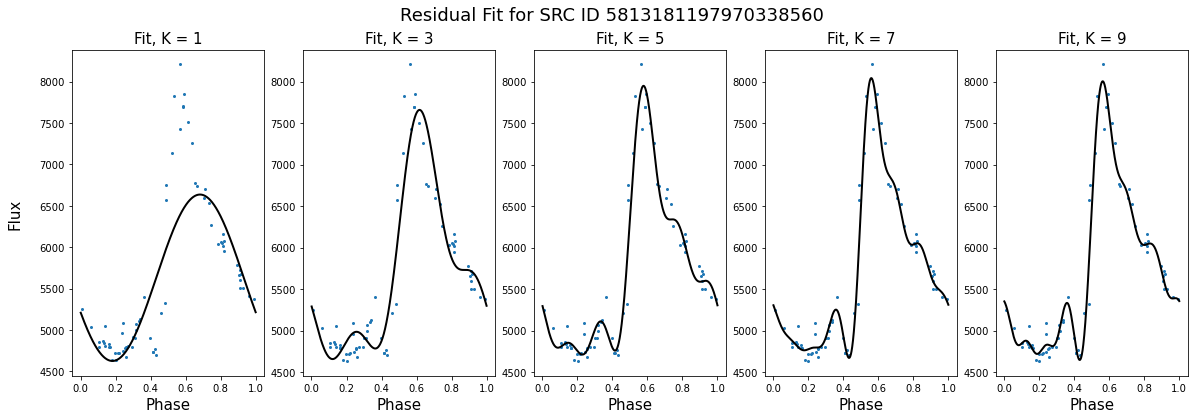

In [26]:
fig, ax = plt.subplots(1, 5, figsize = (20, 6))

for j in range(5):
    K = j * 2 + 1
    
    y = src_id['flux'].iloc[0]
    t = src_id['time'].iloc[0]
    t_fold = t % (src_id['period_ls'].iloc[0]) / (src_id['period_ls'].iloc[0])
    w = 2 * np.pi / src_id['period_ls'].iloc[0]
    wt = 1 / ((src_id['flux_error'].iloc[0]) ** 2)

    X = np.ones((len(y), 2 * K + 1))

    for i in range(1, K + 1):
        X[:, i] = np.sin(i * w * t)
    for i in range(K + 1, 2 * K + 1):
        X[:, i] = np.cos((i - K) * w * t)
    
    Xw = X * np.sqrt(wt)[:, None]
    yw = y * np.sqrt(wt)
    beta = np.linalg.lstsq(Xw, yw, rcond=None)[0]
    
    t_dense = np.linspace(1700, 2400, 1000)
    t_fold_dense = (t_dense % src_id['period_ls'].iloc[0]) / src_id['period_ls'].iloc[0]
    X_dense = np.ones((len(t_dense), 2 * K + 1))

    for i in range(1, K + 1):
        X_dense[:, i] = np.sin(i * w * t_dense)
    for i in range(K + 1, 2 * K + 1):
        X_dense[:, i] = np.cos((i - K) * w * t_dense)

    X_pts = np.ones((len(t), 2 * K + 1))

    for i in range(1, K + 1):
        X_pts[:, i] = np.sin(i * w * t)
    for i in range(K + 1, 2 * K + 1):
        X_pts[:, i] = np.cos((i - K) * w * t)
    
    ax[j].plot(t_fold_dense[idx], (X_dense @ beta)[idx], "k-", lw = 2)
    ax[j].scatter(t_fold, y, s = 4)
    ax[j].set_title(f"Fit, K = {K}", fontsize = 15)
    ax[j].set_xlabel(f"Phase", y = -0.08, fontsize = 15)
    fig.supylabel(f"Flux", x = 0.08, fontsize = 15)
    
fig.suptitle("Residual Fit for SRC ID 5813181197970338560", fontsize = 18, y = 0.98)
plt.savefig("lab1/figures/varyKfit.png", bbox_inches = "tight")

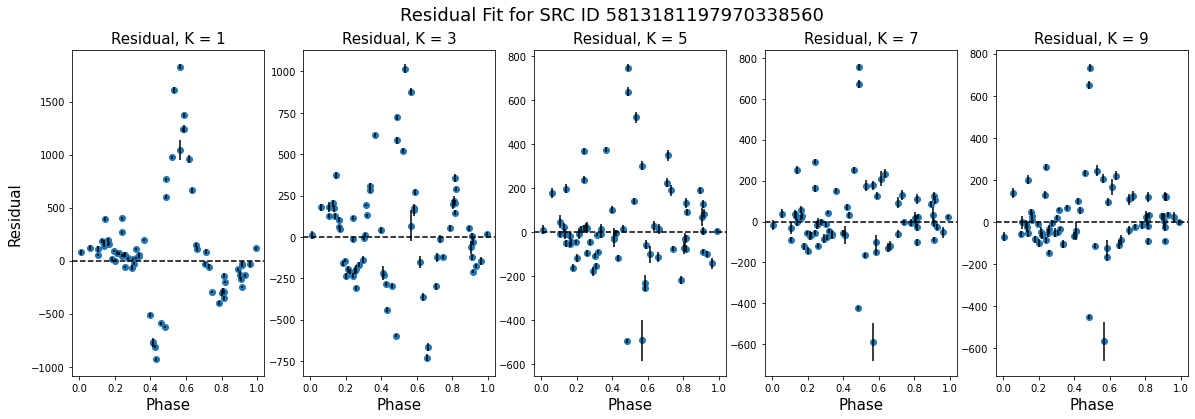

In [27]:
fig, ax = plt.subplots(1, 5, figsize = (20, 6))

for j in range(5):
    K = j * 2 + 1
    
    y = src_id['flux'].iloc[0]
    t = src_id['time'].iloc[0]
    t_fold = t % (src_id['period_ls'].iloc[0]) / (src_id['period_ls'].iloc[0])
    w = 2 * np.pi / src_id['period_ls'].iloc[0]

    X = np.ones((len(y), 2 * K + 1))
    
    for i in range(1, K + 1):
        X[:, i] = np.sin(i * w * t)
    for i in range(K + 1, 2 * K + 1):
        X[:, i] = np.cos((i - K) * w * t)
        
    wt = 1 / ((src_id['flux_error'].iloc[0]) ** 2)
    Xw = X * np.sqrt(wt)[:, None]
    yw = y * np.sqrt(wt)
    beta = np.linalg.lstsq(Xw, yw, rcond=None)[0]
    
    t_dense = np.linspace(1700, 2400, 1000)
    t_fold_dense = (t_dense % src_id['period_ls'].iloc[0]) / src_id['period_ls'].iloc[0]
    X_dense = np.ones((len(t_dense), 2 * K + 1))

    for i in range(1, K + 1):
        X_dense[:, i] = np.sin(i * w * t_dense)
    for i in range(K + 1, 2 * K + 1):
        X_dense[:, i] = np.cos((i - K) * w * t_dense)

    X_pts = np.ones((len(t), 2 * K + 1))

    for i in range(1, K + 1):
        X_pts[:, i] = np.sin(i * w * t)
    for i in range(K + 1, 2 * K + 1):
        X_pts[:, i] = np.cos((i - K) * w * t)
    ax[j].axhline(0, ls = '--', c = 'k')
    #ax[j].scatter(t_fold, y - X @ beta, s = 4)
    ax[j].errorbar(t_fold, y - X @ beta, yerr = (src_id['flux_error'].iloc[0]), fmt = 'o',
                  barsabove = True, ecolor = 'k')
    ax[j].set_title(f"Residual, K = {K}", fontsize = 15)
    ax[j].set_xlabel(f"Phase", y = -0.08, fontsize = 15)
    fig.supylabel(f"Residual", x = 0.08, fontsize = 15)
    
fig.suptitle("Residual Fit for SRC ID 5813181197970338560", fontsize = 18, y = 0.98)
plt.savefig("lab1/figures/varyKres.png", bbox_inches = "tight")

## 1.6

In [28]:
deck = list(range(len(y)))[:int(len(y) * 0.8)]
np.random.shuffle(deck)


In [29]:
chi = []
Ks = list(range(25))

for j in range(25):
    K = j
    y = src_id['flux'].iloc[0]
    t = src_id['time'].iloc[0]
    y_cut = src_id['flux'].iloc[0][deck]
    t_cut = src_id['time'].iloc[0][deck]
    t_fold = t % (src_id['period_ls'].iloc[0]) / (src_id['period_ls'].iloc[0])
    w = 2 * np.pi / src_id['period_ls'].iloc[0]

    X = np.ones((len(y_cut), 2 * K + 1))

    for i in range(1, K + 1):
        X[:, i] = np.sin(i * w * t_cut)
    for i in range(K + 1, 2 * K + 1):
        X[:, i] = np.cos((i - K) * w * t_cut)

    wt = 1 / ((src_id['flux_error'].iloc[0][deck]) ** 2)
    Xw = X * np.sqrt(wt)[:, None]
    yw = y_cut * np.sqrt(wt)
    beta = np.linalg.lstsq(Xw, yw, rcond=None)[0]
    
    t_dense = np.linspace(1700, 2400, 1000)
    t_fold_dense = (t_dense % src_id['period_ls'].iloc[0]) / src_id['period_ls'].iloc[0]
    X_dense = np.ones((len(t_dense), 2 * K + 1))

    for i in range(1, K + 1):
        X_dense[:, i] = np.sin(i * w * t_dense)
    for i in range(K + 1, 2 * K + 1):
        X_dense[:, i] = np.cos((i - K) * w * t_dense)

    X_pts = np.ones((len(t), 2 * K + 1))

    for i in range(1, K + 1):
        X_pts[:, i] = np.sin(i * w * t)
    for i in range(K + 1, 2 * K + 1):
        X_pts[:, i] = np.cos((i - K) * w * t)
    
    chi.append(np.sum(((y - X_pts @ beta) ** 2) / (y)))

    
fig.suptitle("Residual Fit for SRC ID 5813181197970338560", fontsize = 18, y = 0.96)

Text(0.5, 0.96, 'Residual Fit for SRC ID 5813181197970338560')

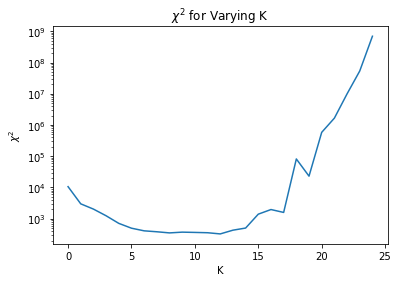

In [30]:
plt.plot(Ks, chi)
plt.title("$\chi^2$ for Varying K")
plt.ylabel("$\chi^2$")
plt.xlabel("K")
plt.semilogy()
plt.savefig("lab1/figures/chisq.png", bbox_inches = "tight")

In [31]:
np.array(chi).argmin() + 1

13

## 1.8

For a value of K of 3 (the minimum), we get the following diagram. 

In [32]:
K = np.array(chi).argmin() + 1
y = src_id['flux'].iloc[0]
t = src_id['time'].iloc[0]
y_cut = src_id['flux'].iloc[0][deck]
t_cut = src_id['time'].iloc[0][deck]
t_fold = t % (src_id['period_ls'].iloc[0]) / (src_id['period_ls'].iloc[0])
w = 2 * np.pi / src_id['period_ls'].iloc[0]

X = np.ones((len(y_cut), 2 * K + 1))

for i in range(1, K + 1):
    X[:, i] = np.sin(i * w * t_cut)
for i in range(K + 1, 2 * K + 1):
    X[:, i] = np.cos((i - K) * w * t_cut)

wt = 1 / ((src_id['flux_error'].iloc[0][deck]) ** 2)
Xw = X * np.sqrt(wt)[:, None]
yw = y_cut * np.sqrt(wt)
beta = np.linalg.lstsq(Xw, yw, rcond=None)[0]

t_dense = np.linspace(2600, 2800, 10000)
t_fold_dense = t_dense % (src_id['period_ls'].iloc[0]) / (src_id['period_ls'].iloc[0])
X_dense = np.ones((len(t_dense), 2 * K + 1))

for i in range(1, K + 1):
    X_dense[:, i] = np.sin(i * w * t_dense)
for i in range(K + 1, 2 * K + 1):
    X_dense[:, i] = np.cos((i - K) * w * t_dense)


In [33]:
def flux_to_mag(flux):
    
    def basic_ftm(flux):
        return -2.5 * np.log10(rrly_epoch["flux"])
    
    mean_ZP = np.mean(rrly_epoch["mag"] - basic_ftm(rrly_epoch["flux"]))
    return -2.5 * np.log10(flux) + mean_ZP

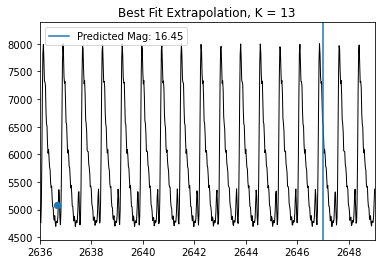

In [34]:
plt.plot(t_dense, (X_dense @ beta), "k-", lw = 1)
plt.scatter(t, y, s = 40, zorder = 10)
plt.xlim((2636, 2649))
plt.axvline(2647, label = f"Predicted Mag: {(flux_to_mag((X_dense @ beta)[(t_dense - 2647).argmin()])).round(2)}")
plt.legend()
plt.title(f"Best Fit Extrapolation, K = {K}")
plt.savefig("lab1/figures/extrapolate.png", bbox_inches = "tight")

In [35]:
flux_mean = (X_dense @ beta)[(t_dense - 2347).argmin()]
flux_mean

4965.101620182145

In [36]:
flux_to_mag(flux_mean)

16.447546513107632

## 1.9

In [37]:
comparison

source_id  period_ls        pf
0    245002531050576896   0.520477  0.520512
1    245504251951140864   0.507129  0.507115
2    245823861938360064   0.613867  0.478764
3    246756973652292992   0.634489  0.489303
4    359112665277840512   0.501771  0.501780
..                  ...        ...       ...
95  6061741130185585280   0.572088  0.459523
96  6061807062215683072   0.642779  0.642767
97  6061866508861866240   6.748514  0.397575
98  6061867986376466688   0.766195  0.766155
99  6061905026177458176   0.627446  0.627454

[100 rows x 3 columns]

In [38]:
super_dataset = final_id.merge(rrly, on = 'source_id')[['source_id', 'time', 'flux', 
                                                        'flux_error', 'period_ls', 'pf', 
                                                        'int_average_g', 'int_average_g_error']]
super_dataset

source_id                                               time  \
0    245002531050576896  [1706.5856067422114, 1739.7894840400877, 1739....   
1    245504251951140864  [1707.0852888573363, 1740.4660972566583, 1740....   
2    245823861938360064  [1706.6587213436203, 1706.834894854087, 1740.2...   
3    246756973652292992  [1706.833539352173, 1740.5384034684919, 1835.0...   
4    359112665277840512  [1702.1574752162173, 1735.20584777197, 1735.27...   
..                  ...                                                ...   
95  6061741130185585280  [1699.7015184323245, 1733.3159979644993, 1733....   
96  6061807062215683072  [1699.4516050034085, 1699.5256071822303, 1733....   
97  6061866508861866240  [1700.1992364346315, 1700.2731966518586, 1734....   
98  6061867986376466688  [1734.8160953295915, 1734.8900991616222, 1780....   
99  6061905026177458176  [1734.8165876407481, 1734.8905912296848, 1780....   

                                                 flux  \
0   [6167.782826967349, 6230.415279264763, 10114.6...   
1   [1255.8047156356179, 1651.2819926840307, 1248....   
2   [566.6804850873045, 291.62298664219804, 468.90...   
3   [211247.9303480375, 226877.54250680207, 181045...   
4   [12739.74890744536, 5843.922463549918, 14443.1...   
..                                                ...   
95  [1916.975147377435, 1336.5647529788066, 1060.9...   
96  [242.52598338817913, 233.59362478531722, 297.0...   
97  [196.9988458899366, 156.51955621580265, 202.74...   
98  [4717.416417272154, 4799.257501011598, 7845.92...   
99  [670.8724916128732, 606.1613197741025, 548.899...   

                                           flux_error  period_ls        pf  \
0   [18.128442302557097, 9.977831359467514, 18.687...   0.520477  0.520512   
1   [15.501401978117528, 9.79862890170444, 8.17436...   0.507129  0.507115   
2   [7.331586492178568, 9.404954570325243, 5.93381...   0.613867  0.478764   
3   [152.0134625088058, 189.2575871507966, 109.582...   0.634489  0.489303   
4   [20.250789599111396, 19.00755587784157, 16.794...   0.501771  0.501780   
..                                                ...        ...       ...   
95  [7.2087954651871735, 5.224353731137919, 11.814...   0.572088  0.459523   
96  [5.9136941112139585, 9.637892294729262, 6.8836...   0.642779  0.642767   
97  [6.348667581004041, 19.63332997764821, 4.88071...   6.748514  0.397575   
98  [9.960908588064056, 20.757746355910268, 19.228...   0.766195  0.766155   
99  [5.1416659488133565, 5.053795479329527, 6.5903...   0.627446  0.627454   

    int_average_g  int_average_g_error  
0       15.929145             0.010242  
1       18.000160             0.007436  
2       19.339872             0.009959  
3       12.362016             0.007657  
4       15.893806             0.016248  
..            ...                  ...  
95      18.010958             0.002310  
96      19.626209             0.003332  
97      19.897871             0.019551  
98      16.289972             0.003721  
99      18.515778             0.016133  

[100 rows x 8 columns]

In [39]:
def flux_to_mag(flux):
    
    def basic_ftm(flux):
        return -2.5 * np.log10(rrly_epoch["flux"])
    
    mean_ZP = np.mean(rrly_epoch["mag"] - basic_ftm(rrly_epoch["flux"]))
    return -2.5 * np.log10(flux) + mean_ZP

In [40]:
def initX(w, t, K):
    
    X = np.ones((len(t), 2 * K + 1))
    
    for i in range(1, K + 1):
        X[:, i] = np.sin(i * w * t)
    for i in range(K + 1, 2 * K + 1):
        X[:, i] = np.cos((i - K) * w * t)
    
    return X

def find_beta(t, y, w, wt, K = 10):
    
    X = initX(w, t, K)

    Xw = X * np.sqrt(wt)[:, None]
    yw = y * np.sqrt(wt)
    beta = np.linalg.lstsq(Xw, yw, rcond=None)[0]
    
    return X, beta

In [41]:
def fit_src(super_dataset, src_id, K = 10, full = False):
    
    src_data = super_dataset[super_dataset['source_id'] == src_id]
    
    period = (src_data['pf'].iloc[0])
    y = src_data['flux'].iloc[0]
    t = src_data['time'].iloc[0]
    t_fold = (t % period) / period
    w = 2 * np.pi / period
    y_err = src_data['flux_error'].iloc[0]
    wt = 1 / ((y_err) ** 2)
    
    X_fit, beta = find_beta(t, y, w, wt, K)
    
    t_dense = np.linspace(1700, 2400, 10000)
    t_fold_dense = (t_dense % period) / period
    
    X_dense = initX(w, t_dense, K)
    
    flux_pred = X_dense @ beta
    
    mean_flux = np.mean(flux_pred)
    mean_mag = flux_to_mag(mean_flux)
    
    if full:
        return mean_mag, mean_flux, t_fold_dense, flux_pred, t_fold, y, y_err, src_id, K
    
    return mean_mag

def plot_fit(mean_mag, mean_flux, t_fold_dense, flux_pred, t_fold, y, y_err, src_id, K, fig = None, ax = None):
    if (fig is None) or (ax is None):
        fig, ax = plt.subplots(1, 1, figsize = (6, 4))
    ax.scatter(t_fold_dense, flux_pred, s = 1, c = 'k')
    ax.errorbar(t_fold, y, yerr = y_err, fmt = 'o',
                  barsabove = True, ecolor = 'k')
    ax.axhline(mean_flux, c = 'k', ls = "--", lw = 1, label = f"Mean Mag: {mean_mag.round(2)}")
    ax.set_title(f"Best Fit @ K = {K} for SRCID: {src_id}")
    ax.set_xlabel("Phase")
    ax.set_ylabel("Flux")
    ax.legend()
    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Best Fit @ K = 5 for SRCID: 1934591533705740928'}, xlabel='Phase', ylabel='Flux'>)

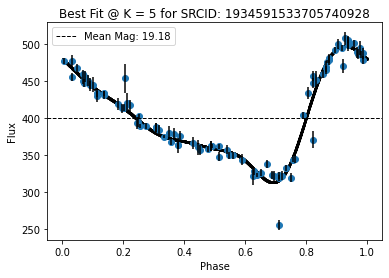

In [42]:
plot_fit(*fit_src(super_dataset, super_dataset["source_id"].iloc[19], K = 5, full = True))

In [43]:
def fit_all(super_dataset):
    
    mean_mag = np.zeros(len(super_dataset.index))
    
    for i in range(len(super_dataset.index)):
        mean_mag[i] = fit_src(super_dataset, super_dataset["source_id"].iloc[i], K = 5, full = False)
    
    super_dataset["mean_mag"] = mean_mag
    
    return super_dataset

In [44]:
fitted_dataset = fit_all(super_dataset)
dup = fitted_dataset[["source_id", "mean_mag", "int_average_g"]]

In [45]:
dup.columns = ['Source ID', 'Estimated G Magnitude', 'GAIA G Magnitude']
print(dup[['Source ID', 'Estimated G Magnitude', 'GAIA G Magnitude']][20:25].reset_index(drop = True)\
      .style.to_latex(position_float = 'centering', hrules = True))

\begin{table}
\centering
\begin{tabular}{lrrr}
\toprule
 & Source ID & Estimated G Magnitude & GAIA G Magnitude \\
\midrule
0 & 1934784777174637056 & 19.289039 & 19.289589 \\
1 & 1934869366550952448 & 17.465653 & 17.450500 \\
2 & 1935104150941800448 & 16.878619 & 16.879194 \\
3 & 1935230693559394816 & 18.123521 & 18.120331 \\
4 & 1935418400810447872 & 17.859488 & 17.860941 \\
\bottomrule
\end{tabular}
\end{table}



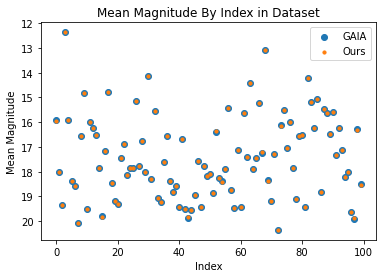

In [46]:
plt.scatter(fitted_dataset.index, fitted_dataset['int_average_g'], label = "GAIA")
plt.scatter(fitted_dataset.index, fitted_dataset['mean_mag'], s = 10, label = "Ours")
plt.title("Mean Magnitude By Index in Dataset")
plt.xlabel("Index")
plt.ylabel("Mean Magnitude")
plt.gca().invert_yaxis()
plt.legend()
plt.savefig("lab1/figures/gaiavsus.png", bbox_inches = "tight")

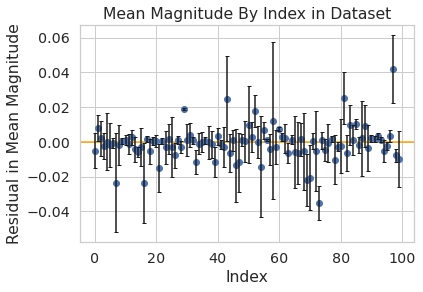

In [61]:
#plt.scatter(fitted_dataset.index, fitted_dataset['int_average_g'] - fitted_dataset['mean_mag'])
plt.errorbar(fitted_dataset.index, 
             fitted_dataset['int_average_g'] - fitted_dataset['mean_mag'], 
             yerr = fitted_dataset['int_average_g_error'],
             fmt = 'o',
             ecolor = 'k',
             barsabove = True,
            capsize = 2,
            zorder = 10)
plt.axhline(0, c = 'orange')
plt.title("Mean Magnitude By Index in Dataset")
plt.xlabel("Index")
plt.ylabel("Residual in Mean Magnitude")
plt.savefig("lab1/figures/gaiavsusres.png", bbox_inches = "tight")

These results are mostly in agreement. Note that we are only considering the GAIA magnitude error in order to depict on this residual, as we did not calculate a mean magnitude error.

## 1.10

In [3]:
from astroquery.gaia import Gaia

In [2]:
def get_data(query):
    Gaia.ROW_LIMIT = 100

    job = Gaia.launch_job_async(query, dump_to_file=True)
    
    return job.get_results().to_pandas()

def get_photometry(rrly):
    retrieval_type = 'EPOCH_PHOTOMETRY'   # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
    data_structure = 'COMBINED'   # Options are: 'INDIVIDUAL', 'COMBINED', 'RAW'
    data_release   = 'Gaia DR3'     # Options are: 'Gaia DR3' (default), 'Gaia DR2'


    datalink = Gaia.load_data(ids=rrly['source_id'],
                              data_release = data_release,
                              retrieval_type=retrieval_type, 
                              data_structure = data_structure, 
                              verbose = False, 
                              output_file = None)

    dl_keys  = [inp for inp in datalink.keys()]
    dl_keys.sort()

    print()
    print(f'The following Datalink products have been downloaded:')
    for dl_key in dl_keys:
        print(f' * {dl_key}')
    
    rrly_epoch = datalink['EPOCH_PHOTOMETRY_COMBINED.xml'][0].to_table().to_pandas()
    rrly_epoch = rrly_epoch[rrly_epoch['band'] == 'G']
    
    return rrly_epoch

def get_grouped_lcs(table):
    
    src_id = pd.DataFrame(table.groupby(['source_id'])['time'].apply(np.array))
    src_id['flux'] = table.groupby(['source_id'])['flux'].apply(np.array)
    src_id['flux_error'] = table.groupby(['source_id'])['flux_error'].apply(np.array)
    
    return src_id

def get_freq_power(table, index, freq_min, freq_max, full = False):
    freq, power = LombScargle(table.loc[index]['time'], 
                table.loc[index]['flux'], table.loc[index]['flux_error'])\
                .autopower(minimum_frequency= freq_min, 
                           maximum_frequency= freq_max)
    if full:
        return freq, power
    
    return 1 / freq[power.argmax()]

def map_freq_power(table, freq_min = 0.125, freq_max = 2):
    tablen = len(table)
    table = table.reset_index()
    table['period_ls'] = table['index'].map(lambda x: get_freq_power(table, x, freq_min, freq_max))
    table['freq'] = table['index'].map(lambda x: get_freq_power(table, x,freq_min, freq_max, full = True)[0])
    table['power'] = table['index'].map(lambda x: get_freq_power(table, x, freq_min, freq_max, full = True)[1])
    return table

In [62]:
q = f"""SELECT TOP 100 * \
    FROM gaiadr3.vari_rrlyrae \
    WHERE num_clean_epochs_g > 80
    AND int_average_g > 15;"""

rrly_temp = get_data(q)
rrly_c = rrly_temp[rrly_temp['best_classification'] == 'RRc'][:3]

In [63]:
rrly_c

solution_id            source_id  pf  pf_error      p1_o  \
2  375316653866487565   414133601528648192 NaN       NaN  0.386146   
3  375316653866487565  6061538029773730560 NaN       NaN  0.324205   
4  375316653866487565  6061554625538484352 NaN       NaN  0.398688   

     p1_o_error      epoch_g  epoch_g_error     epoch_bp  epoch_bp_error  ...  \
2  7.587004e-07  1699.271201       0.000001  1699.276155        0.000005  ...   
3  1.223200e-06  1698.893859       0.000002  1698.890304        0.000011  ...   
4  7.248807e-07  1698.836396       0.000001  1698.829122        0.000005  ...   

                   fund_freq1_harmonic_ampl_rp_error  \
2  [0.0018252716, 0.002052707, 0.0017630123, --, ...   
3  [0.013212812, --, --, --, --, --, --, --, --, ...   
4  [0.009205811, 0.012968735, --, --, --, --, --,...   

                        fund_freq1_harmonic_phase_rp  \
2  [4.355779, 0.90174896, 3.6255894, 0.0, 0.0, 0....   
3  [0.024058603, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....   
4  [4.768041, 2.563904, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                  fund_freq1_harmonic_phase_rp_error  \
2  [0.021821775, 0.096523285, 0.17978042, --, --,...   
3  [0.2557112, --, --, --, --, --, --, --, --, --...   
4  [0.15234628, 0.45125613, --, --, --, --, --, -...   

   fund_freq1_harmonic_ampl_rv  fund_freq1_harmonic_ampl_rv_error  \
2                          NaN                                NaN   
3                          NaN                                NaN   
4                          NaN                                NaN   

   fund_freq1_harmonic_phase_rv  fund_freq1_harmonic_phase_rv_error  \
2                           NaN                                 NaN   
3                           NaN                                 NaN   
4                           NaN                                 NaN   

   best_classification  g_absorption  g_absorption_error  
2                  RRc           NaN                 NaN  
3                  RRc           NaN                 NaN  
4                  RRc           NaN                 NaN  

[3 rows x 78 columns]

In [64]:
rrly_c_epoch = get_photometry(rrly_c)


The following Datalink products have been downloaded:
 * EPOCH_PHOTOMETRY_COMBINED.xml


In [65]:
src_id = get_grouped_lcs(rrly_c_epoch).reset_index()
src_id = map_freq_power(src_id, freq_min = 0.01, freq_max = 4)

In [66]:
super_dataset_c = src_id.merge(rrly_c, on = 'source_id')[['source_id', 'time', 'flux', 
                                                        'flux_error', 'period_ls', 'pf', 
                                                        'int_average_g', 'int_average_g_error']]
super_dataset_c["pf"] = super_dataset_c["period_ls"]

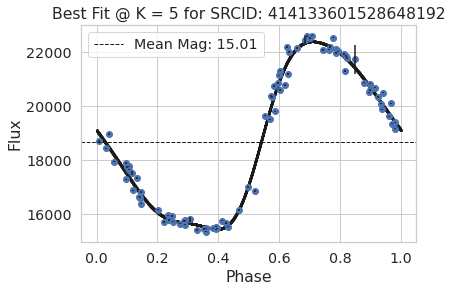

In [67]:
plot_fit(*fit_src(super_dataset_c, super_dataset_c["source_id"].iloc[0], K = 5, full = True))

In [68]:
q = f"""SELECT TOP 100 * \
    FROM gaiadr3.vari_rrlyrae \
    WHERE num_clean_epochs_g > 40;"""

rrly_temp = get_data(q)
rrly_ab = rrly_temp[rrly_temp['best_classification'] == 'RRab'][:3]

In [69]:
rrly_ab

solution_id           source_id        pf  pf_error  p1_o  \
0  375316653866487565  245002531050576896  0.520512  0.000006   NaN   
1  375316653866487565  245504251951140864  0.507115  0.000004   NaN   
3  375316653866487565  245823861938360064  0.478764  0.000003   NaN   

   p1_o_error      epoch_g  epoch_g_error     epoch_bp  epoch_bp_error  ...  \
0         NaN  1705.132336       0.000008  1705.141478        0.000010  ...   
1         NaN  1705.941237       0.000006  1705.959324        0.000018  ...   
3         NaN  1705.224346       0.000004  1705.720646        0.000042  ...   

                   fund_freq1_harmonic_ampl_rp_error  \
0  [0.010494326, 0.016995786, 0.016227422, 0.0126...   
1  [0.076050304, 0.047721848, 0.060700245, --, --...   
3  [0.031176094, 0.035711657, --, --, --, --, --,...   

                        fund_freq1_harmonic_phase_rp  \
0  [1.1146808, 0.13735867, 5.741053, 5.4488583, 0...   
1  [4.1733904, 5.8748026, 3.042096, 0.0, 0.0, 0.0...   
3  [2.7668881, 3.016339, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                  fund_freq1_harmonic_phase_rp_error  \
0  [0.06407403, 0.13510026, 0.17668393, 0.3136657...   
1  [0.44735354, 0.31560725, 0.54333, --, --, --, ...   
3  [0.34352157, 0.54970133, --, --, --, --, --, -...   

   fund_freq1_harmonic_ampl_rv  fund_freq1_harmonic_ampl_rv_error  \
0                          NaN                                NaN   
1                          NaN                                NaN   
3                          NaN                                NaN   

   fund_freq1_harmonic_phase_rv  fund_freq1_harmonic_phase_rv_error  \
0                           NaN                                 NaN   
1                           NaN                                 NaN   
3                           NaN                                 NaN   

   best_classification  g_absorption  g_absorption_error  
0                 RRab      1.122552            0.077198  
1                 RRab      2.049920            0.235075  
3                 RRab      1.247847            0.149523  

[3 rows x 78 columns]

In [70]:
rrly_ab_epoch = get_photometry(rrly_ab)


The following Datalink products have been downloaded:
 * EPOCH_PHOTOMETRY_COMBINED.xml


In [71]:
src_id = get_grouped_lcs(rrly_ab_epoch).reset_index()
src_id = map_freq_power(src_id, freq_min = 0.25, freq_max = 2)

In [72]:
super_dataset_ab = src_id.merge(rrly_ab, on = 'source_id')[['source_id', 'time', 'flux', 
                                                        'flux_error', 'period_ls', 'pf', 
                                                        'int_average_g', 'int_average_g_error']]

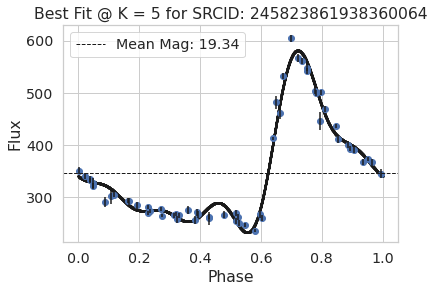

In [73]:
ax = plot_fit(*fit_src(super_dataset_ab, super_dataset_ab["source_id"].iloc[2], K = 5, full = True))

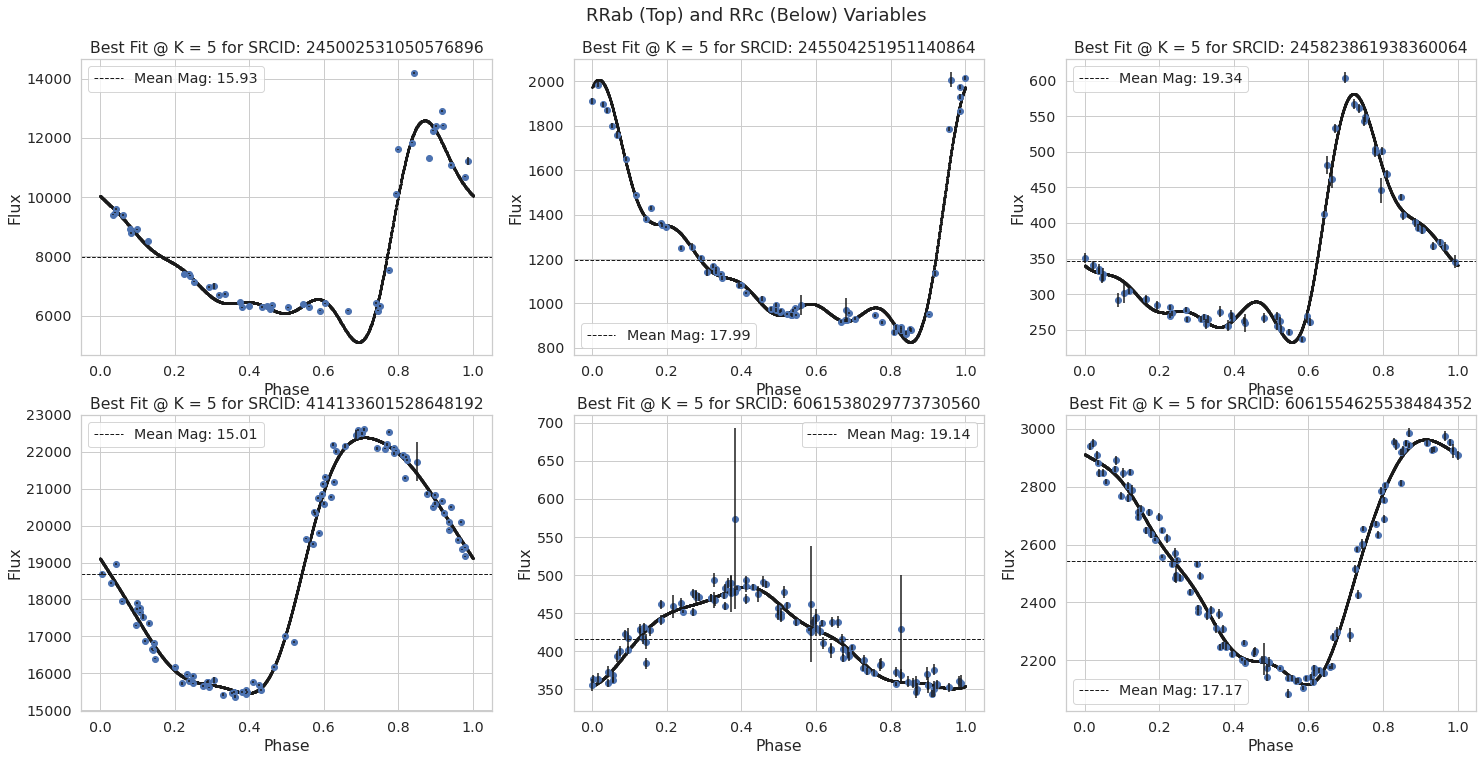

In [76]:
fig, ax = plt.subplots(2, 3, figsize = (25, 12))
for i in range(3):
    fig, ax[0, i] = plot_fit(*fit_src(super_dataset_ab, super_dataset_ab["source_id"].iloc[i], K = 5, full = True), fig = fig, ax = ax[0, i])
for i in range(3):
    fig, ax[1, i] = plot_fit(*fit_src(super_dataset_c, super_dataset_c["source_id"].iloc[i], K = 5, full = True), fig = fig, ax = ax[1, i])
    
fig.suptitle("RRab (Top) and RRc (Below) Variables", fontsize = 18, y = 0.94)
plt.savefig("lab1/figures/RRabcCompare.png", bbox_inches = "tight")

The RRc fits tend to seem more sinusoidal, while RRab seem more like sawtooth waves. Additionally, the RRc variables tend to have a shorter period, and the frequency range in Lomb-Scargle actually had to be stretched out from the prior RRab range to locate the ideal period value. RRab compose about 90% of Lyrae, and RRc are relatively rare.

## Q11

There is not significant evidence of scatter in my dataset. Therefore, I cannot directly comment on the deviations from the RR Lyrae. That said, the deviations that exist can be due to bimodal and multimodal signatures in the frequency decomposition, which correspond to multiple periodic signatures present in the Lyrae variable. This is due to the Blahzko effect, described in Netzel et al. 2018.

## Q12 and 13 and modified 15

First, we’ll need to use Gaia distances to estimate the absolute magnitude of RR Lyraes. This will
only work if there isn’t a lot of dust between us and the RR Lyraes. Explain why this is.  

_This is because the RR Lyrae stars with a lot of dust in their line of sight will appear dimmer than they should be at their distance in question, due to extinction. This effect causes us to be uncertain regarding the true absolute magnitude of the star, and can give us false results in the period-luminosity relation._

In [72]:
q = f"""SELECT TOP 600 (1/parallax) as dist,phot_g_mean_mag+5*log10(parallax)-10 as mg, * \
    FROM gaiadr3.vari_rrlyrae AS rrly \
    JOIN gaiadr3.gaia_source AS dr3 ON
        rrly.source_id = dr3.source_id \
    JOIN external.gaiaedr3_distance AS ext ON
        rrly.source_id = ext.source_id
    WHERE parallax_error < 0.2 \
    AND parallax > 0 \
    AND ABS(b) > 30 \
    AND (1 / parallax) < 4
    AND SQRT(astrometric_chi2_al / (astrometric_n_good_obs_al - 5)) < 
        1.2 * GREATEST(1, EXP(-0.2 * (phot_g_mean_mag - 19.5))) \
    AND 1 + 0.015 * POWER(bp_rp, 2) < phot_bp_rp_excess_factor \
    AND phot_bp_rp_excess_factor < 1.3 + 0.06 * POWER(bp_rp, 2);"""

rrly_temp = get_data(q)


In [73]:
from astropy.io.votable import parse_single_table
votable = parse_single_table("1664840641814O-result.vot.gz")

In [74]:
rrly_temp = pd.DataFrame.from_records(votable.array)

The difference between the photogeometric distance and the actual distance is not only that a galactic prior is used, but also that the color of the star makes a big difference. The photogeometric distance predicts a stars location based on it's color, and similar stars in the galaxy.

In [75]:
rrly_temp = rrly_temp[rrly_temp["best_classification"] == 'RRab']

## Q14

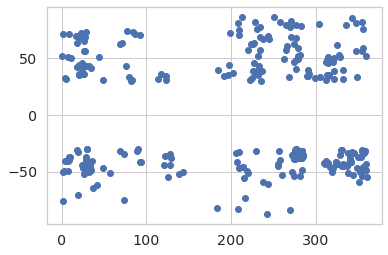

In [76]:
plt.scatter(rrly_temp["l"], rrly_temp["b"])

In [77]:
rrly_temp["distance"] = rrly_temp["dist"] * 1000 
rrly_temp[["r_lo_geo", "r_med_geo", "r_hi_geo", "distance"]].head()

r_lo_geo    r_med_geo     r_hi_geo     distance
0  3081.922363  3251.905273  3426.777588  3730.017741
1  1558.121216  1607.305420  1652.500854  1681.581982
4  1809.585815  1885.836792  1978.618652  1993.213270
5  2213.685303  2297.734863  2390.433350  2447.075008
6  2500.501465  2607.285645  2714.123047  2769.579660

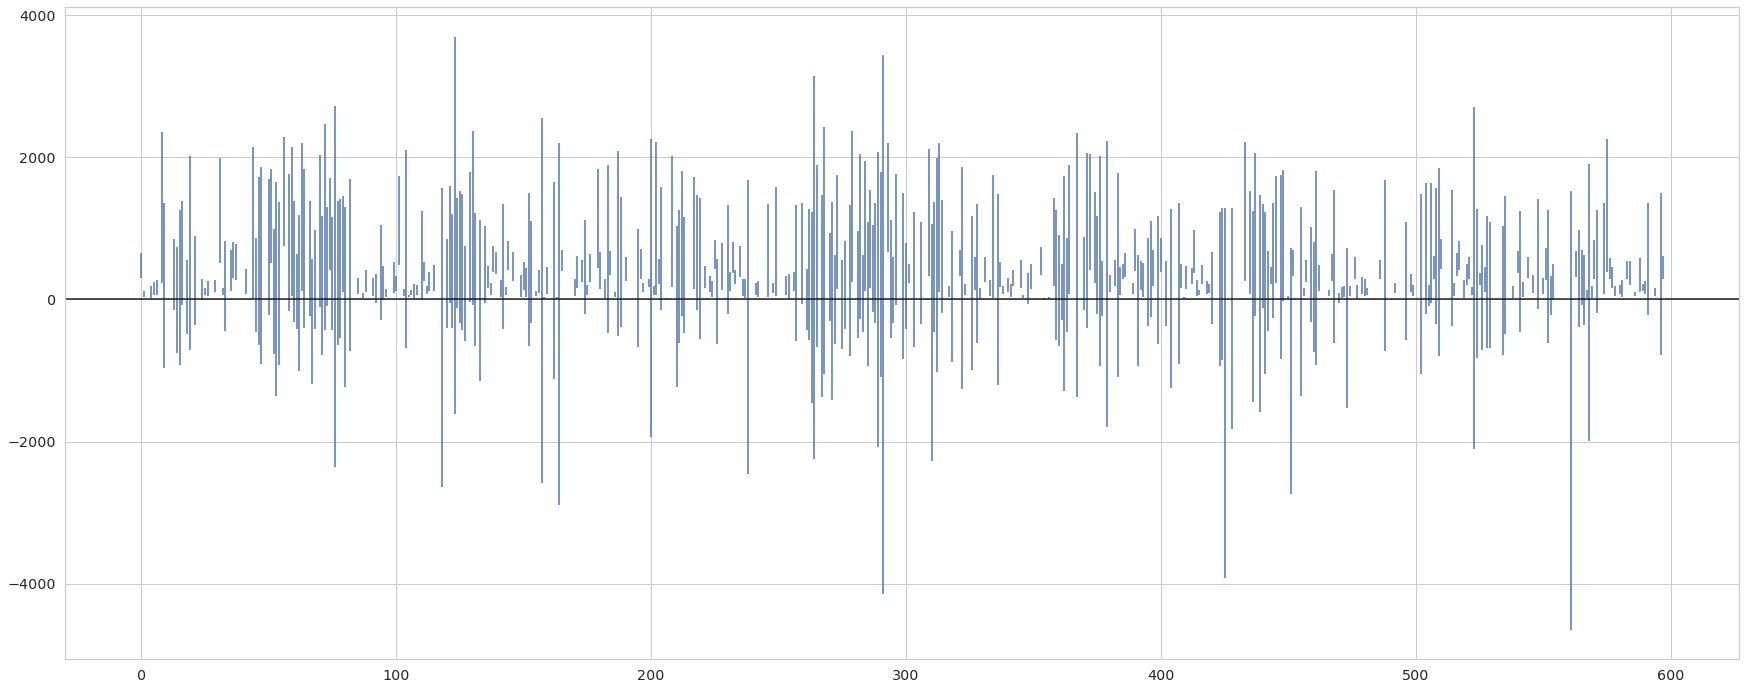

In [78]:
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
ax.errorbar(rrly_temp.index, rrly_temp["distance"] - rrly_temp["r_med_geo"], yerr = 
             (rrly_temp["r_lo_geo"] - rrly_temp["r_hi_geo"]) / 2, fmt = 'none')
ax.axhline(0, color = "k")

The errors are mostly in agreement, however, they are not ideal in a variety of cases. 

## Q15, Q16, Q17, Q18

In [79]:
rrly_temp["absmag_parallax"] = rrly_temp["int_average_g"] + 5 * np.log10(rrly_temp["parallax"]/ 1000) + 5
rrly_temp["absmag_parallax_err"] = (5 / rrly_temp["parallax"]) * rrly_temp["parallax_error"]
rrly_temp["dmed"] =  rrly_temp["r_med_geo"]
rrly_temp["derr"] = ((rrly_temp["r_hi_geo"]) - (rrly_temp["r_lo_geo"])) / 2
rrly_temp["absmag_bj"] = rrly_temp["int_average_g"] - 5 * np.log10(rrly_temp["dmed"]) + 5
rrly_temp["absmag_bj_err"] = (5 / rrly_temp["dmed"]) * rrly_temp["derr"]

In [80]:
dup = rrly_temp[["source_id", "absmag_bj", "absmag_parallax"]]
dup.columns = ['Source ID', 'Absolute Magnitude (Bailer Jones)', 'Absolute Magnitude (GAIA Parallax)']
print(dup[['Source ID', 'Absolute Magnitude (Bailer Jones)', 'Absolute Magnitude (GAIA Parallax)']][20:25].reset_index(drop = True)\
      .style.to_latex(position_float = 'centering', hrules = True))

\begin{table}
\centering
\begin{tabular}{lrrr}
\toprule
 & Source ID & Absolute Magnitude (Bailer Jones) & Absolute Magnitude (GAIA Parallax) \\
\midrule
0 & 3845688531150809088 & 6.732132 & 6.531588 \\
1 & 1154484945718095872 & 1.153962 & 0.899458 \\
2 & 1154932172072449280 & 1.189392 & 0.866913 \\
3 & 1157097900741574656 & 0.909857 & 0.591792 \\
4 & 1163903534120157952 & 0.556792 & 0.377947 \\
\bottomrule
\end{tabular}
\end{table}



In [81]:
rrly_temp = rrly_temp[rrly_temp["absmag_bj"] < 2]

Text(0.5, 1.0, 'RR Lyrae Period vs. Luminosity (Photogeometric)')

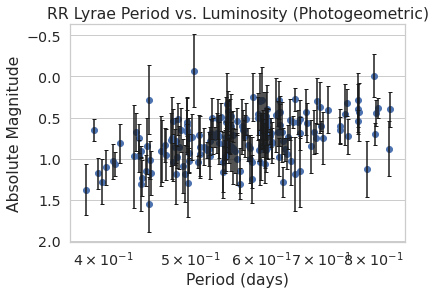

In [82]:
plt.errorbar(rrly_temp["pf"], rrly_temp["absmag_bj"], yerr = rrly_temp["absmag_bj_err"], 
             fmt = 'o', ecolor = 'k', barsabove = True, capsize = 2)
plt.gca().invert_yaxis()
plt.semilogx()
plt.xlabel("Period (days)")
plt.ylabel("Absolute Magnitude")
plt.title("RR Lyrae Period vs. Luminosity (Photogeometric)")

Text(0.5, 1.0, 'RR Lyrae Period vs. Luminosity (Parallax)')

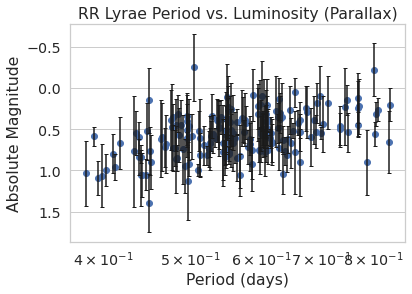

In [83]:
plt.errorbar(rrly_temp["pf"], rrly_temp["absmag_parallax"], yerr = rrly_temp["absmag_parallax_err"], 
             fmt = 'o', ecolor = 'k', barsabove = True, capsize = 2)
plt.gca().invert_yaxis()
plt.semilogx()
plt.xlabel("Period (days)")
plt.ylabel("Absolute Magnitude")
plt.title("RR Lyrae Period vs. Luminosity (Parallax)")

## Q19

In [84]:
rrly_temp["lnP"] = np.log10(rrly_temp["pf"])
m_basic, b_basic = np.polyfit(rrly_temp["lnP"], rrly_temp["absmag_bj"], 1)

<ErrorbarContainer object of 3 artists>

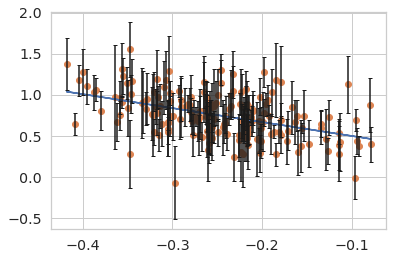

In [85]:
plt.plot(rrly_temp["lnP"], m_basic * rrly_temp["lnP"]+ b_basic)
plt.errorbar(rrly_temp["lnP"], rrly_temp["absmag_bj"], yerr = rrly_temp["absmag_bj_err"], 
             fmt = 'o', ecolor = 'k', barsabove = True, capsize = 2)

In [86]:
m_basic, b_basic

(-1.695953234834461, 0.3310031069981377)

/srv/conda/envs/notebook/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (5 chains in 2 jobs)
NUTS: [logsig, b, m]
INFO:pymc3:NUTS: [logsig, b, m]


Sampling 5 chains for 1_000 tune and 10_000 draw iterations (5_000 + 50_000 draws total) took 63 seconds.
INFO:pymc3:Sampling 5 chains for 1_000 tune and 10_000 draw iterations (5_000 + 50_000 draws total) took 63 seconds.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/tmp/ipykernel_131/2673614105.py:24: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  _ = pm.traceplot(trace, var_names=["m", "b", "logsig"])


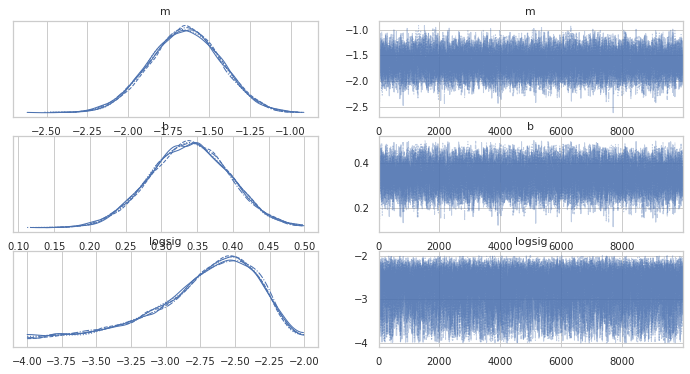

In [87]:
import pymc3 as pm

# set up the model
with pm.Model() as model:
    
    # define priors
    m = pm.Uniform("m", lower=-3, upper=0)
    b = pm.Uniform("b", lower=-0.3, upper=0.5)
    logsig = pm.Uniform("logsig", lower=-4, upper=-2)
    
    # define the log-likelihood function
    # note that numpy doesn't play nicely with PyMC, so you should use their built in math functions
    pm.Normal("obs", mu = m*rrly_temp['lnP'].values+b, 
              sigma=pm.math.sqrt(pm.math.exp(logsig) ** 2 + rrly_temp['absmag_bj_err'].values ** 2), 
                                 observed=rrly_temp['absmag_bj'].values)

    # now set up the model to run
    # default of PyMC is to use the no-turn sampler (NUTS)
    
    # pm.sample will run the sampler and store output in 'trace' 
    trace = pm.sample(draws=10000, tune=1000, chains=5, cores=2)
    
    # traceplot is a routine for plotting the 'traces' from the samples
    _ = pm.traceplot(trace, var_names=["m", "b", "logsig"])
    
    # pm.summary provides some useful summary and convergance statistics
    pm.summary(trace, var_names=["m", "b", "logsig"])
plt.savefig("lab1/figures/bj_trace.png", bbox_inches = 'tight')

In [22]:
summ_fit_bj = pm.summary(trace, var_names=["m", "b", "logsig"])
summ_fit_bj

Got error No model on context stack. trying to find log_likelihood in translation.
/srv/conda/envs/notebook/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
m      -1.650  0.219  -2.074   -1.249      0.002    0.002   10076.0    6906.0   
b       0.339  0.056   0.231    0.442      0.001    0.000   10132.0    7497.0   
logsig -2.735  0.414  -3.582   -2.072      0.004    0.003   12667.0    7280.0   

        r_hat  
m         1.0  
b         1.0  
logsig    1.0

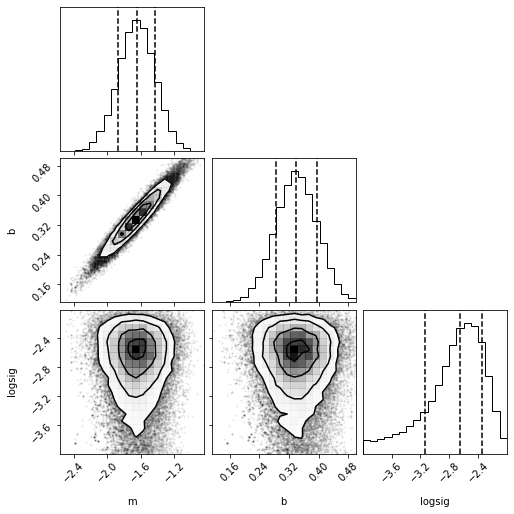

In [23]:
# corner is a nice routine for visualizing the marginalized posterior distributions
# 1d plots (1d histograms) are called marginalized distributions
# 2d plots (2d histograms) are called joint (marginazlied) distributions

import corner

# translate trace into pandas dataframe for plotting (you can also plot numpy arrays with corner)
samples = pm.trace_to_dataframe(trace, varnames=["m", "b", "logsig"])

# make the corner plot and plot results from Hubble's paper as 'truth'
# overplot percentiles: 16, 50, 84 on 1d historgrams
_ = corner.corner(samples, truths=[500, 0, None], quantiles=[.16, .50, .84])
plt.savefig("lab1/figures/bj_corner.png", bbox_inches = 'tight')

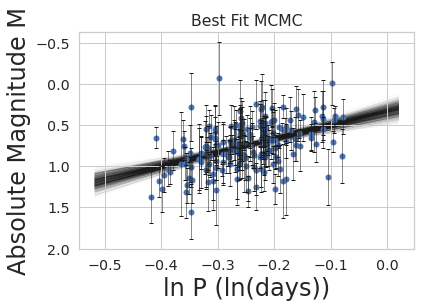

In [101]:
import seaborn as sns

sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
plt.errorbar(rrly_temp["lnP"], rrly_temp["absmag_bj"], yerr = rrly_temp["absmag_bj_err"], 
             fmt = 'o', ecolor = 'k', barsabove = True, capsize = 2, ms = 5, lw = 0.5)
plt.xlabel('ln P (ln(days))', size=24)
plt.ylabel('Absolute Magnitude M', size=24)

# make an array of 'distances'
lnP = np.linspace(rrly_temp["lnP"].min() - 0.1, rrly_temp["lnP"].max() + 0.1, 100)


# set random seed
np.random.seed(42)

# this code loops over the trace array and pulls 500 random sets of m,b, and logsig
# it then generates 500 posterior models (i.e., lines in velocity and distance space) and overplots them on the data

for i in np.random.randint(len(trace) * trace.nchains, size=1000):
    plt.plot(lnP, samples['m'][i]*lnP + samples['b'][i], color="k", lw=0.1, alpha=0.2, zorder=0)

plt.title("Best Fit MCMC")
plt.gca().invert_yaxis()
plt.savefig("lab1/figures/MCMC_bj.png", bbox_inches = "tight")

In [ ]:
summ_fit

## Q20

In [102]:
q = f"""SELECT TOP 600 (1/parallax) as dist,phot_g_mean_mag+5*log10(parallax)-10 as mg, * \
    FROM gaiadr3.vari_rrlyrae AS rrly \
    JOIN gaiadr3.gaia_source AS dr3 ON
        rrly.source_id = dr3.source_id \
    JOIN external.gaiaedr3_distance AS ext ON
        rrly.source_id = ext.source_id \
    JOIN gaiadr3.allwise_best_neighbour AS wbn ON
        rrly.source_id = wbn.source_id \
    JOIN gaiadr1.allwise_original_valid AS allw USING (allwise_oid) \
    WHERE parallax_error < 0.2 \
    AND parallax > 0 \
    AND ABS(b) > 30 \
    AND (1 / parallax) < 4 \
    AND SQRT(astrometric_chi2_al / (astrometric_n_good_obs_al - 5)) < 
        1.2 * GREATEST(1, EXP(-0.2 * (phot_g_mean_mag - 19.5))) \
    AND 1 + 0.015 * POWER(bp_rp, 2) < phot_bp_rp_excess_factor \
    AND phot_bp_rp_excess_factor < 1.3 + 0.06 * POWER(bp_rp, 2);"""

rrly_temp = get_data(q)


In [24]:
from astropy.io.votable import parse_single_table
votable = parse_single_table("1664870804902O-result.vot.gz")
rrly_temp = pd.DataFrame.from_records(votable.array)
rrly_temp = rrly_temp[rrly_temp["best_classification"] == 'RRab']

In [25]:
rrly_temp["dmed"] =  rrly_temp["r_med_geo"]
rrly_temp["derr"] = ((rrly_temp["r_hi_geo"]) - (rrly_temp["r_lo_geo"])) / 2
rrly_temp["absmag_wise"] = rrly_temp["w2mpro"] - 5 * np.log10(rrly_temp["dmed"]) + 5
rrly_temp["absmag_wise_err"] = (5 / rrly_temp["dmed"]) * rrly_temp["derr"]
rrly_temp = rrly_temp[rrly_temp["absmag_wise"] < 1.7]

Text(0.5, 1.0, 'RR Lyrae Period vs. Luminosity (Photogeometric)')

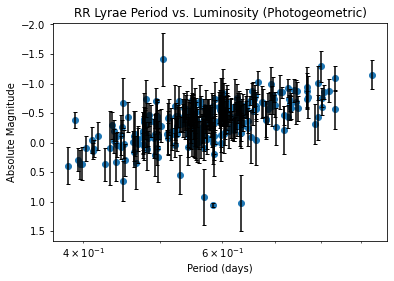

In [26]:

plt.errorbar(rrly_temp["pf"], rrly_temp["absmag_wise"], yerr = rrly_temp["absmag_wise_err"], 
             fmt = 'o', ecolor = 'k', barsabove = True, capsize = 2)
plt.gca().invert_yaxis()
plt.semilogx()
plt.xlabel("Period (days)")
plt.ylabel("Absolute Magnitude")
plt.title("RR Lyrae Period vs. Luminosity (Photogeometric)")

In [27]:
rrly_temp["lnP"] = np.log10(rrly_temp["pf"])
m_basic, b_basic = np.polyfit(rrly_temp["lnP"], rrly_temp["absmag_wise"], 1)

<ErrorbarContainer object of 3 artists>

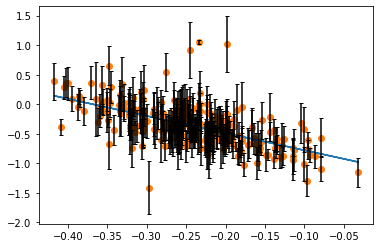

In [28]:
plt.plot(rrly_temp["lnP"], m_basic * rrly_temp["lnP"]+ b_basic)
plt.errorbar(rrly_temp["lnP"], rrly_temp["absmag_wise"], yerr = rrly_temp["absmag_wise_err"], 
             fmt = 'o', ecolor = 'k', barsabove = True, capsize = 2)

In [29]:
m_basic, b_basic

(-2.9053532554530785, -1.0693020101997313)

/srv/conda/envs/notebook/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (5 chains in 2 jobs)
NUTS: [logsig, b, m]
INFO:pymc3:NUTS: [logsig, b, m]


Sampling 5 chains for 1_000 tune and 10_000 draw iterations (5_000 + 50_000 draws total) took 73 seconds.
INFO:pymc3:Sampling 5 chains for 1_000 tune and 10_000 draw iterations (5_000 + 50_000 draws total) took 73 seconds.
/tmp/ipykernel_131/2871867898.py:24: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  _ = pm.traceplot(trace, var_names=["m", "b", "logsig"])


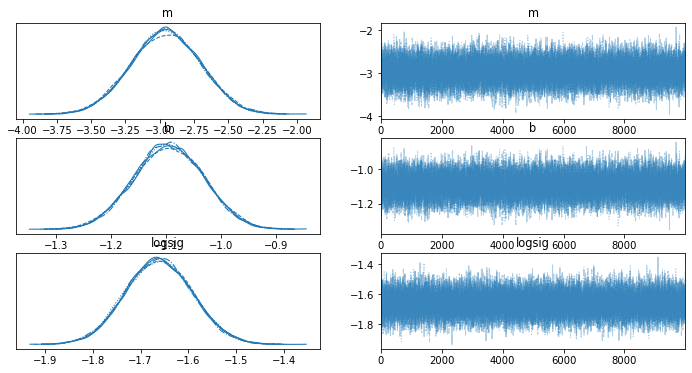

In [30]:
import pymc3 as pm

# set up the model
with pm.Model() as model:
    
    # define priors
    m = pm.Uniform("m", lower=-6, upper=0)
    b = pm.Uniform("b", lower=-1.5, upper=-0.5)
    logsig = pm.Uniform("logsig", lower=-10, upper=10)
    
    # define the log-likelihood function
    # note that numpy doesn't play nicely with PyMC, so you should use their built in math functions
    pm.Normal("obs", mu = m*rrly_temp['lnP'].values+b, 
              sigma=pm.math.sqrt(pm.math.exp(logsig) ** 2 + rrly_temp['absmag_wise_err'].values ** 2), 
                                 observed=rrly_temp['absmag_wise'].values)

    # now set up the model to run
    # default of PyMC is to use the no-turn sampler (NUTS)
    
    # pm.sample will run the sampler and store output in 'trace' 
    trace = pm.sample(draws=10000, tune=1000, chains=5, cores=2)
    
    # traceplot is a routine for plotting the 'traces' from the samples
    _ = pm.traceplot(trace, var_names=["m", "b", "logsig"])
    
    # pm.summary provides some useful summary and convergance statistics
    pm.summary(trace, var_names=["m", "b", "logsig"])
plt.savefig("lab1/figures/wise_trace.png", bbox_inches = 'tight')

In [31]:
summ_fit2 = pm.summary(trace, var_names=["m", "b", "logsig"])
summ_fit2

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/srv/conda/envs/notebook/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
m      -2.956  0.251  -3.429   -2.487      0.002    0.001   19353.0   21121.0   
b      -1.095  0.063  -1.215   -0.978      0.000    0.000   19387.0   20628.0   
logsig -1.661  0.070  -1.791   -1.529      0.000    0.000   24150.0   21917.0   

        r_hat  
m         1.0  
b         1.0  
logsig    1.0

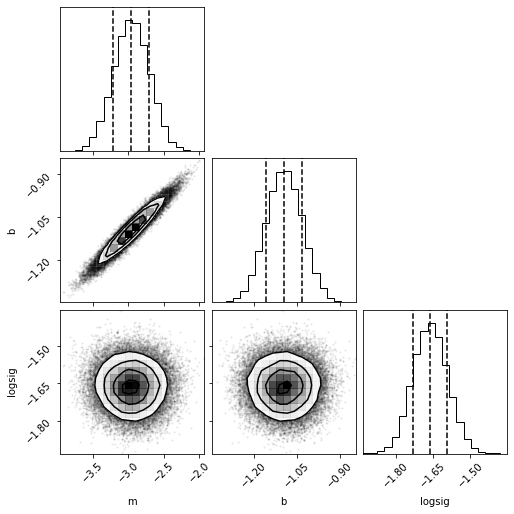

In [32]:
# corner is a nice routine for visualizing the marginalized posterior distributions
# 1d plots (1d histograms) are called marginalized distributions
# 2d plots (2d histograms) are called joint (marginazlied) distributions

import corner

# translate trace into pandas dataframe for plotting (you can also plot numpy arrays with corner)
samples = pm.trace_to_dataframe(trace, varnames=["m", "b", "logsig"])

# make the corner plot and plot results from Hubble's paper as 'truth'
# overplot percentiles: 16, 50, 84 on 1d historgrams
_ = corner.corner(samples, truths=[500, 0, None], quantiles=[.16, .50, .84])

# how big is the scatter/typical error in the data?
# let's use the median of logsig for this
plt.savefig("lab1/figures/wise_corner.png", bbox_inches = 'tight')

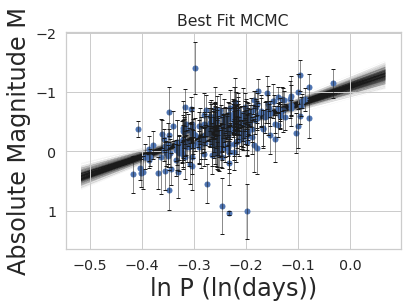

In [112]:
import seaborn as sns

sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
plt.errorbar(rrly_temp["lnP"], rrly_temp["absmag_wise"], yerr = rrly_temp["absmag_wise_err"], 
             fmt = 'o', ecolor = 'k', barsabove = True, capsize = 2, ms = 5, lw = 0.5)
plt.xlabel('ln P (ln(days))', size=24)
plt.ylabel('Absolute Magnitude M', size=24)

# make an array of 'distances'
lnP = np.linspace(rrly_temp["lnP"].min() - 0.1, rrly_temp["lnP"].max() + 0.1, 100)


# set random seed
np.random.seed(42)

# this code loops over the trace array and pulls 500 random sets of m,b, and logsig
# it then generates 500 posterior models (i.e., lines in velocity and distance space) and overplots them on the data

for i in np.random.randint(len(trace) * trace.nchains, size=1000):
    plt.plot(lnP, samples['m'][i]*lnP + samples['b'][i], color="k", lw=0.1, alpha=0.2, zorder=0)

plt.title("Best Fit MCMC")
plt.gca().invert_yaxis()
plt.savefig("lab1/figures/MCMC_wise.png", bbox_inches = "tight")

## Q22

The slope is steeper in the infrared, in WISE magnitudes. Fromt he figure below, we find that for ~ 4.6 $\mu m$, corresponding to the effective wavelength of the Wise W2 passband, the slope is -2.5. This is close, but not in agreement with our result. This could be due to systematic errors in our pipeline, specifically a result of not accounding for Wise magnitude errors.

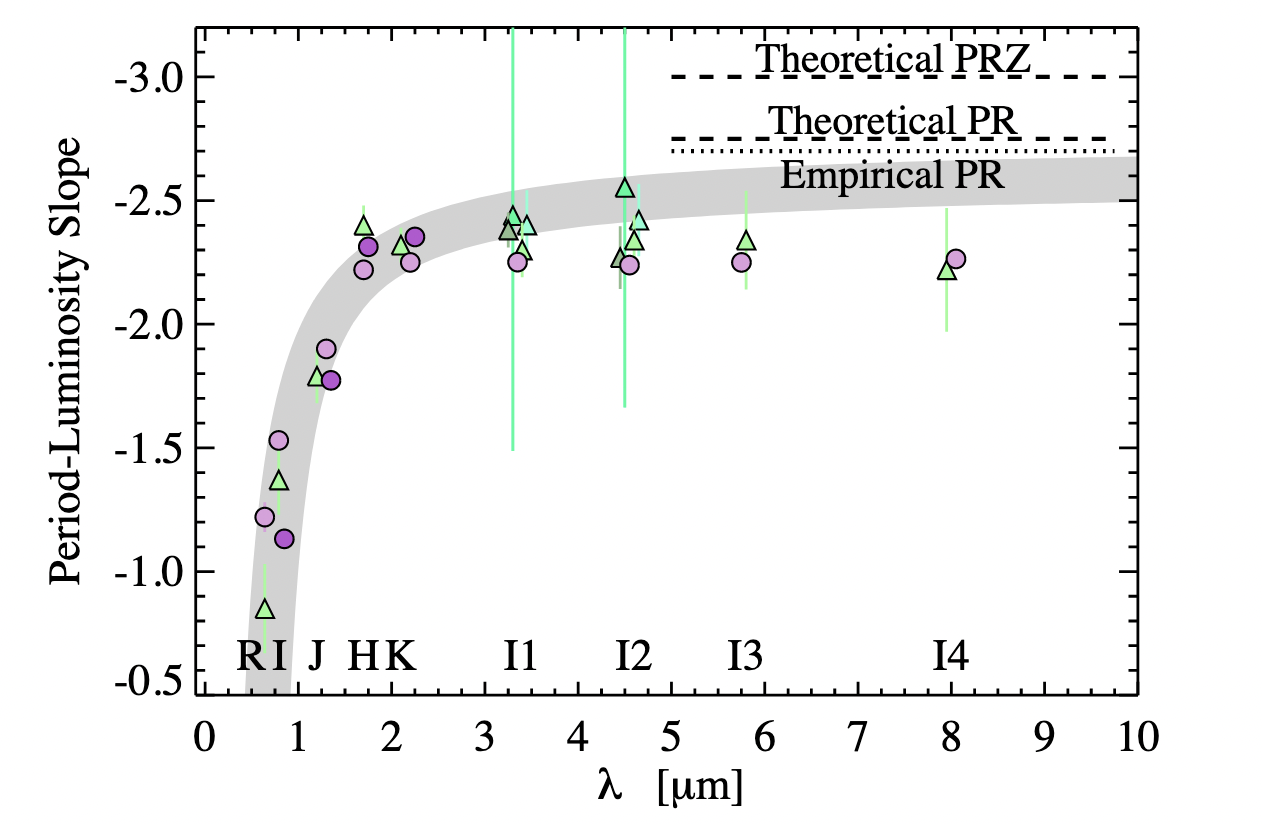

## Q24

In [33]:
import astropy
import astroquery
import matplotlib.pyplot as plt
from astroquery.utils.tap.core import TapPlus
import pandas as pd
from astropy.coordinates import ICRS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.gaia import Gaia
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def flux_to_mag(flux):
    
    def basic_ftm(flux):
        return -2.5 * np.log10(rrly_epoch["flux"])
    
    mean_ZP = np.mean(rrly_epoch["mag"] - basic_ftm(rrly_epoch["flux"]))
    return -2.5 * np.log10(flux) + mean_ZP

def get_data(query):
    Gaia.ROW_LIMIT = 100

    job = Gaia.launch_job_async(query, dump_to_file=True)
    
    return job.get_results().to_pandas()

def get_photometry(rrly):
    retrieval_type = 'EPOCH_PHOTOMETRY'   # Options are: 'EPOCH_PHOTOMETRY', 'MCMC_GSPPHOT', 'MCMC_MSC', 'XP_SAMPLED', 'XP_CONTINUOUS', 'RVS', 'ALL'
    data_structure = 'COMBINED'   # Options are: 'INDIVIDUAL', 'COMBINED', 'RAW'
    data_release   = 'Gaia DR3'     # Options are: 'Gaia DR3' (default), 'Gaia DR2'


    datalink = Gaia.load_data(ids=rrly['source_id'],
                              data_release = data_release,
                              retrieval_type=retrieval_type, 
                              data_structure = data_structure, 
                              verbose = False, 
                              output_file = None)

    dl_keys  = [inp for inp in datalink.keys()]
    dl_keys.sort()

    print()
    print(f'The following Datalink products have been downloaded:')
    for dl_key in dl_keys:
        print(f' * {dl_key}')
    
    rrly_epoch = datalink['EPOCH_PHOTOMETRY_COMBINED.xml'][0].to_table().to_pandas()
    rrly_epoch = rrly_epoch[rrly_epoch['band'] == 'G']
    
    return rrly_epoch

def get_grouped_lcs(table):
    
    src_id = pd.DataFrame(table.groupby(['source_id'])['time'].apply(np.array))
    src_id['flux'] = table.groupby(['source_id'])['flux'].apply(np.array)
    src_id['flux_error'] = table.groupby(['source_id'])['flux_error'].apply(np.array)
    
    return src_id

def get_freq_power(table, index, freq_min, freq_max, full = False):
    freq, power = LombScargle(table.loc[index]['time'], 
                table.loc[index]['flux'], table.loc[index]['flux_error'])\
                .autopower(minimum_frequency= freq_min, 
                           maximum_frequency= freq_max)
    if full:
        return freq, power
    
    return 1 / freq[power.argmax()]

def map_freq_power(table, freq_min = 0.125, freq_max = 2):
    tablen = len(table)
    table = table.reset_index()
    table['period_ls'] = table['index'].map(lambda x: get_freq_power(table, x, freq_min, freq_max))
    table['freq'] = table['index'].map(lambda x: get_freq_power(table, x,freq_min, freq_max, full = True)[0])
    table['power'] = table['index'].map(lambda x: get_freq_power(table, x, freq_min, freq_max, full = True)[1])
    return table

In [35]:
q = f"""SELECT TOP 1000 (1/parallax) as dist,phot_g_mean_mag+5*log10(parallax)-10 as mg, * \
    FROM gaiadr3.vari_rrlyrae AS rrly \
    JOIN gaiadr3.gaia_source AS dr3 ON
        rrly.source_id = dr3.source_id \
    JOIN external.gaiaedr3_distance AS ext ON
        rrly.source_id = ext.source_id \
    JOIN gaiadr3.allwise_best_neighbour AS wbn ON
        rrly.source_id = wbn.source_id \
    JOIN gaiadr1.allwise_original_valid AS allw USING (allwise_oid) \
    WHERE parallax_error < 0.2 \
    AND parallax > 0 \
    AND ABS(b) > 30 \
    AND (1 / parallax) < 4 \
    AND SQRT(astrometric_chi2_al / (astrometric_n_good_obs_al - 5)) < 
        1.2 * GREATEST(1, EXP(-0.2 * (phot_g_mean_mag - 19.5))) \
    AND 1 + 0.015 * POWER(bp_rp, 2) < phot_bp_rp_excess_factor \
    AND phot_bp_rp_excess_factor < 1.3 + 0.06 * POWER(bp_rp, 2);"""

rrly_temp = get_data(q)
rrly_temp = rrly_temp[rrly_temp["best_classification"] == 'RRab']

In [36]:
len(rrly_temp)

657

In [37]:
rrly_temp["dmed"] =  rrly_temp["r_med_geo"]
rrly_temp["derr"] = ((rrly_temp["r_hi_geo"]) - (rrly_temp["r_lo_geo"])) / 2
rrly_temp["color"] = rrly_temp["bp_rp"]
rrly_temp["bp_err"] = -2.5 / (np.log(10) * rrly_temp["phot_bp_mean_flux"]) * rrly_temp["phot_bp_mean_flux_error"]
rrly_temp["rp_err"] = -2.5 / (np.log(10) * rrly_temp["phot_rp_mean_flux"]) * rrly_temp["phot_rp_mean_flux_error"]
rrly_temp["color_err"] = rrly_temp["bp_rp"] * np.sqrt(
                (rrly_temp["bp_err"]/ rrly_temp["phot_bp_mean_mag"]) ** 2 + (rrly_temp["bp_err"]/ rrly_temp["phot_bp_mean_mag"]) ** 2)
rrly_temp = rrly_temp[(rrly_temp["color"] < 1.5) & (rrly_temp["color"] > 0.25)]

Text(0.5, 1.0, 'RR Lyrae Period vs. Luminosity (Photogeometric)')

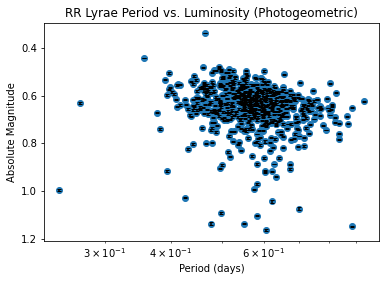

In [38]:
plt.errorbar(rrly_temp["pf"], rrly_temp["color"], yerr = rrly_temp["color_err"], 
             fmt = 'o', ecolor = 'k', barsabove = True, capsize = 2)
plt.gca().invert_yaxis()
plt.semilogx()
plt.xlabel("Period (days)")
plt.ylabel("Absolute Magnitude")
plt.title("RR Lyrae Period vs. Luminosity (Photogeometric)")

In [39]:
rrly_temp["lnP"] = np.log10(rrly_temp["pf"])
m_basic, b_basic = np.polyfit(rrly_temp["lnP"], rrly_temp["color"], 1)

<ErrorbarContainer object of 3 artists>

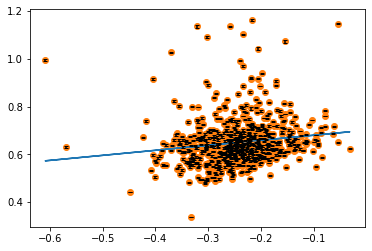

In [40]:
plt.plot(rrly_temp["lnP"], m_basic * rrly_temp["lnP"]+ b_basic)
plt.errorbar(rrly_temp["lnP"], rrly_temp["color"], yerr = rrly_temp["color_err"], 
             fmt = 'o', ecolor = 'k', barsabove = True, capsize = 2)

In [41]:
m_basic, b_basic

(0.2105869828587679, 0.7011687119841965)

/srv/conda/envs/notebook/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 2 jobs)
INFO:pymc3:Multiprocess sampling (5 chains in 2 jobs)
NUTS: [logsig, b, m]
INFO:pymc3:NUTS: [logsig, b, m]


Sampling 5 chains for 1_000 tune and 10_000 draw iterations (5_000 + 50_000 draws total) took 78 seconds.
INFO:pymc3:Sampling 5 chains for 1_000 tune and 10_000 draw iterations (5_000 + 50_000 draws total) took 78 seconds.
/tmp/ipykernel_131/1375055155.py:24: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  _ = pm.traceplot(trace, var_names=["m", "b", "logsig"])


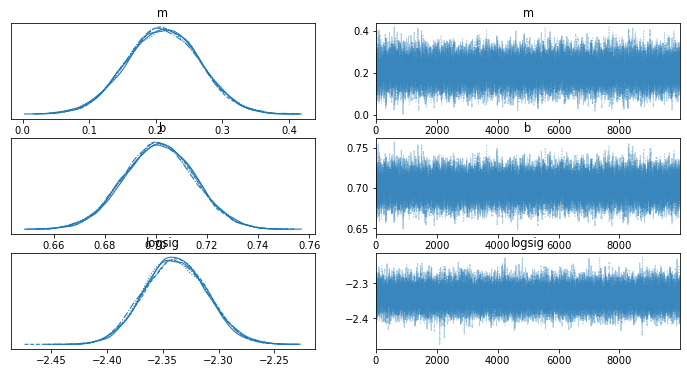

In [42]:
import pymc3 as pm

# set up the model
with pm.Model() as model:
    
    # define priors
    m = pm.Uniform("m", lower=-2, upper=2)
    b = pm.Uniform("b", lower=-1, upper=3)
    logsig = pm.Uniform("logsig", lower=-10, upper=10)
    
    # define the log-likelihood function
    # note that numpy doesn't play nicely with PyMC, so you should use their built in math functions
    pm.Normal("obs", mu = m*rrly_temp['lnP'].values+b, 
              sigma=pm.math.sqrt(pm.math.exp(logsig) ** 2 + rrly_temp['color_err'].values ** 2), 
                                 observed=rrly_temp['color'].values)

    # now set up the model to run
    # default of PyMC is to use the no-turn sampler (NUTS)
    
    # pm.sample will run the sampler and store output in 'trace' 
    trace = pm.sample(draws=10000, tune=1000, chains=5, cores=2)
    
    # traceplot is a routine for plotting the 'traces' from the samples
    _ = pm.traceplot(trace, var_names=["m", "b", "logsig"])
    
    # pm.summary provides some useful summary and convergance statistics
    pm.summary(trace, var_names=["m", "b", "logsig"])
plt.savefig("lab1/figures/bprp_trace.png", bbox_inches = 'tight')

In [43]:
summ_fit3 = pm.summary(trace, var_names=["m", "b", "logsig"])
summ_fit3

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/srv/conda/envs/notebook/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
m       0.211  0.055   0.108    0.313        0.0      0.0   19532.0   21435.0   
b       0.701  0.014   0.675    0.727        0.0      0.0   19531.0   21035.0   
logsig -2.339  0.028  -2.391   -2.287        0.0      0.0   24768.0   22976.0   

        r_hat  
m         1.0  
b         1.0  
logsig    1.0

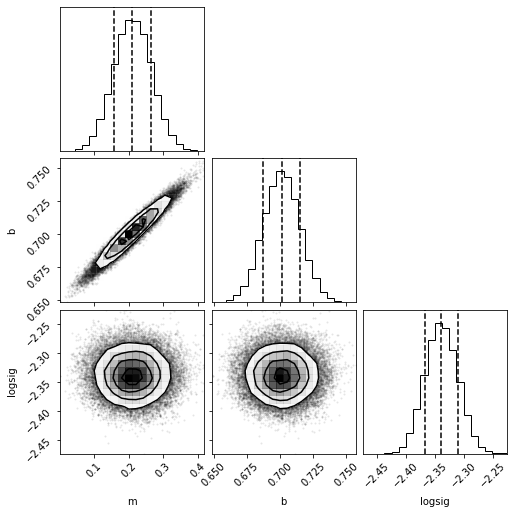

In [44]:
# corner is a nice routine for visualizing the marginalized posterior distributions
# 1d plots (1d histograms) are called marginalized distributions
# 2d plots (2d histograms) are called joint (marginazlied) distributions

import corner

# translate trace into pandas dataframe for plotting (you can also plot numpy arrays with corner)
samples = pm.trace_to_dataframe(trace, varnames=["m", "b", "logsig"])

# make the corner plot and plot results from Hubble's paper as 'truth'
# overplot percentiles: 16, 50, 84 on 1d historgrams
_ = corner.corner(samples, truths=[500, 0, None], quantiles=[.16, .50, .84])

# how big is the scatter/typical error in the data?
# let's use the median of logsig for this
plt.savefig("lab1/figures/bprp_corner.png", bbox_inches = 'tight')

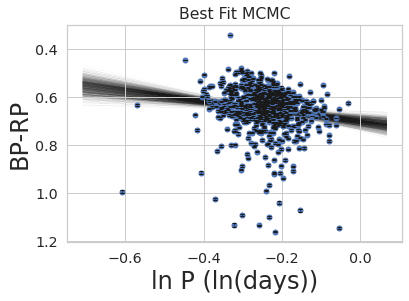

In [45]:
import seaborn as sns

sns.set(style="whitegrid", color_codes=True, font_scale=1.3)
plt.errorbar(rrly_temp["lnP"], rrly_temp["color"], yerr = rrly_temp["color_err"], 
             fmt = 'o', ecolor = 'k', barsabove = True, capsize = 2, ms = 5, lw = 0.5)
plt.xlabel('ln P (ln(days))', size=24)
plt.ylabel('BP-RP', size=24)

# make an array of 'distances'
lnP = np.linspace(rrly_temp["lnP"].min() - 0.1, rrly_temp["lnP"].max() + 0.1, 100)


# set random seed
np.random.seed(42)

# this code loops over the trace array and pulls 500 random sets of m,b, and logsig
# it then generates 500 posterior models (i.e., lines in velocity and distance space) and overplots them on the data

for i in np.random.randint(len(trace) * trace.nchains, size=1000):
    plt.plot(lnP, samples['m'][i]*lnP + samples['b'][i], color="k", lw=0.1, alpha=0.2, zorder=0)

plt.title("Best Fit MCMC")
plt.gca().invert_yaxis()
plt.savefig("lab1/figures/MCMC_BPRP.png", bbox_inches = "tight")

In [46]:
summ_fit.to_csv("summ_fit.csv")

NameError: name 'summ_fit' is not defined

In [67]:
dup = summ_fit_bj[['mean', 'sd']].join(summ_fit2[['mean', 'sd']], rsuffix = "1").join(summ_fit3[['mean', 'sd']], rsuffix = "2")
dup.columns = ["Gaia G Mean", "Gaia G SD (+-)", "WISE W2 Mean", "Wise W2 SD (+-)", "BP-RP Mean", "BP-RP SD (+-)"]
print(dup[["Gaia G Mean", "Gaia G SD (+-)", "WISE W2 Mean", "Wise W2 SD (+-)", "BP-RP Mean", "BP-RP SD (+-)"]]\
      .style.to_latex(position_float = 'centering', hrules = True))

\begin{table}
\centering
\begin{tabular}{lrrrrrr}
\toprule
 & Gaia G Mean & Gaia G SD (+-) & WISE W2 Mean & Wise W2 SD (+-) & BP-RP Mean & BP-RP SD (+-) \\
\midrule
m & -1.650000 & 0.219000 & -2.956000 & 0.251000 & 0.211000 & 0.055000 \\
b & 0.339000 & 0.056000 & -1.095000 & 0.063000 & 0.701000 & 0.014000 \\
logsig & -2.735000 & 0.414000 & -1.661000 & 0.070000 & -2.339000 & 0.028000 \\
\bottomrule
\end{tabular}
\end{table}



## Q25, Q26, Q27

In [127]:
q = f"""SELECT TOP 300000 bp_rp, pf, g_absorption, best_classification, l, b \
    FROM gaiadr3.vari_rrlyrae AS rrly \
    JOIN gaiadr3.gaia_source AS dr3 ON
        rrly.source_id = dr3.source_id \
    LEFT JOIN external.gaiaedr3_distance AS ext ON
        rrly.source_id = ext.source_id \
    WHERE parallax > 0 \
    AND SQRT(astrometric_chi2_al / (astrometric_n_good_obs_al - 5)) < 
        1.2 * GREATEST(1, EXP(-0.2 * (phot_g_mean_mag - 19.5))) \
    AND 1 + 0.015 * POWER(bp_rp, 2) < phot_bp_rp_excess_factor \
    AND phot_bp_rp_excess_factor < 1.3 + 0.06 * POWER(bp_rp, 2) \
    AND pf IS NOT NULL;"""

rrly_temp = get_data(q)
rrly_temp = rrly_temp[rrly_temp["best_classification"] == 'RRab']

In [128]:
summ_fit = pd.read_csv("summ_fit.csv")

In [129]:
summ_fit

Unnamed: 0   mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
0          m  0.211  0.055   0.108    0.314        0.0      0.0   19493.0   
1          b  0.701  0.014   0.676    0.728        0.0      0.0   19749.0   
2     logsig -2.338  0.028  -2.391   -2.286        0.0      0.0   25832.0   

   ess_tail  r_hat  
0   21051.0    1.0  
1   21710.0    1.0  
2   24193.0    1.0

In [10]:
from astropy.io.votable import parse_single_table
votable = parse_single_table("1665010542969O-result.vot.gz")
rrly_temp = pd.DataFrame.from_records(votable.array)
rrly_temp = rrly_temp[rrly_temp["best_classification"] == 'RRab']

In [130]:
intrinsic_m = summ_fit['mean'][0]
intrinsic_b = summ_fit['mean'][1]

intrinsic = lambda lnp: intrinsic_m * lnp + intrinsic_b

In [131]:
rrly_temp["Ag"] =  2 * (rrly_temp["bp_rp"] - intrinsic(np.log10(rrly_temp["pf"])))

In [132]:
rrly_temp[["Ag", "g_absorption"]]

Ag  g_absorption
0      0.977739      1.122552
1      1.446009      2.049920
2      1.522545      1.708960
3      4.090759           NaN
4      0.563714      0.480276
...         ...           ...
88653  0.402620      0.557334
88654  0.468600      0.546159
88655  0.592552      0.715257
88656  0.683114      0.640282
88657  1.087033      1.309696

[87523 rows x 2 columns]

In [133]:
rad = lambda x: np.radians(x)

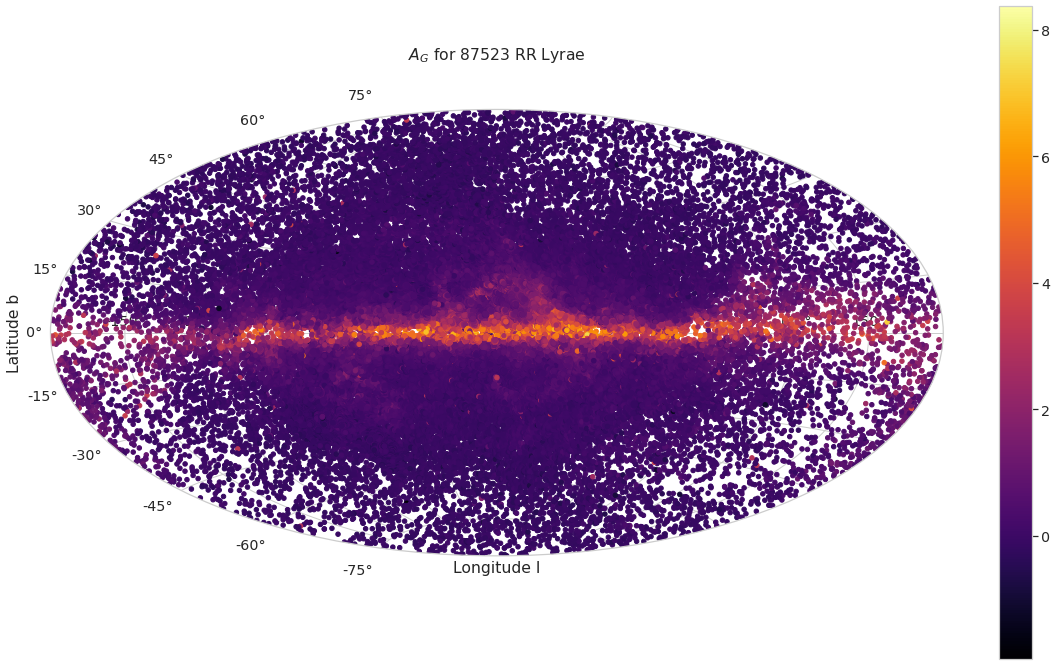

In [134]:
from astropy import units as u
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(111, projection='aitoff')
coords = SkyCoord(l=rrly_temp['l'], b=rrly_temp['b'], frame = 'galactic', unit='degree')
l = coords.l.wrap_at(180 * u.deg).radian
b = coords.b.radian
plt.scatter(l, b, c = rrly_temp['Ag'], s = 20, cmap = 'inferno')
plt.colorbar()
plt.title(f"$A_G$ for {len(rrly_temp)} RR Lyrae", y = 1.1)
plt.xlabel("Longitude l", y = -0.3)
plt.ylabel("Latitude b")
plt.savefig("lab1/figures/Ag.png", bbox_inches = "tight")

/srv/conda/envs/notebook/lib/python3.9/site-packages/numpy/lib/function_base.py:3615: RuntimeWarning: invalid value encountered in true_divide
  return sin(y)/y


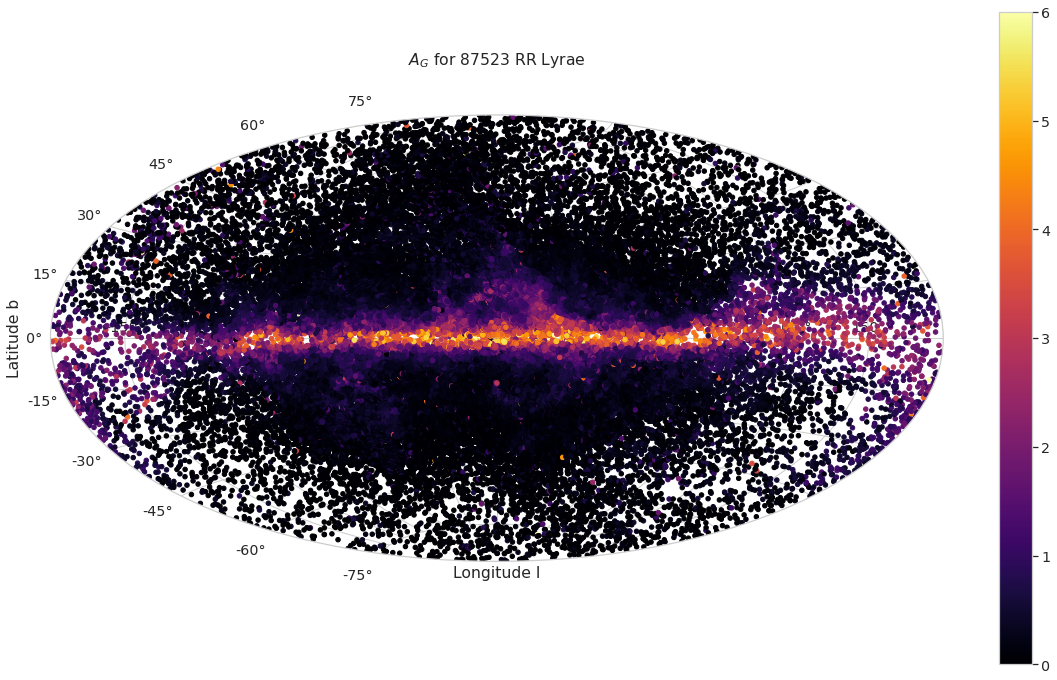

In [135]:
from astropy import units as u
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(111, projection='aitoff')
coords = SkyCoord(l=rrly_temp['l'], b=rrly_temp['b'], frame = 'galactic', unit='degree')
l = coords.l.wrap_at(180 * u.deg).radian
b = coords.b.radian
plt.scatter(l, b, c = rrly_temp['g_absorption'], s = 20, cmap = 'inferno', vmin = 0, vmax = 6)
plt.colorbar()
plt.title(f"$A_G$ for {len(rrly_temp)} RR Lyrae", y = 1.1)
plt.xlabel("Longitude l", y = -0.3)
plt.ylabel("Latitude b")
plt.savefig("lab1/figures/g_absorption.png", bbox_inches = "tight")

## Q29

In [136]:
import dustmaps.sfd
dustmaps.sfd.fetch()

Configuration file not found:

    /home/jovyan/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


 63.2 MiB of 64.0 MiB |  48.3 MiB/s |################## |  98% | ETA:   0:00:00

 63.2 MiB of 64.0 MiB |  41.8 MiB/s |################## |  98% | ETA:   0:00:00

In [137]:
from __future__ import print_function
import numpy as np
from astropy.coordinates import SkyCoord
from dustmaps.sfd import SFDQuery

sfd = SFDQuery()
ebv = sfd(coords)

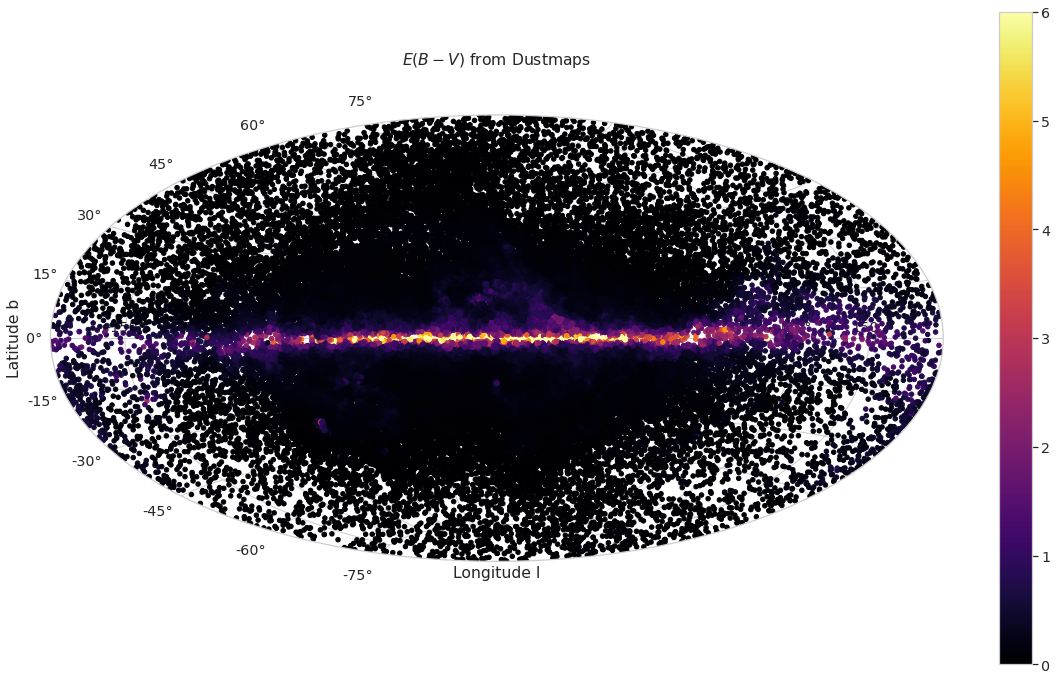

In [139]:
from astropy import units as u
fig = plt.figure(figsize=(20, 12))
fig.add_subplot(111, projection='aitoff')
coords = SkyCoord(l=rrly_temp['l'], b=rrly_temp['b'], frame = 'galactic', unit='degree')
l = coords.l.wrap_at(180 * u.deg).radian
b = coords.b.radian
plt.scatter(l, b, c = ebv, s = 20, cmap = 'inferno', vmin = 0, vmax = 6)
plt.colorbar()
plt.title(f"$E(B-V)$ from Dustmaps", y = 1.1)
plt.xlabel("Longitude l", y = -0.3)
plt.ylabel("Latitude b")
plt.savefig("lab1/figures/dustmaps.png", bbox_inches = "tight")